<a href="https://colab.research.google.com/github/irutavias/healthcare/blob/main/Healthcare_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading and Verification:

In [1]:
import pandas as pd

# Load data
geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_GEO.CSV', encoding='latin1')

prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_PRVSVC.CSV', encoding = 'latin1')

geo_data_19 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY19_GEO.CSV', encoding='latin1')

prov_data_19 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY19_PRVSVC.CSV', encoding = 'latin1')

geo_data_20 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY20_GEO.CSV', encoding = 'latin1')

prov_data_20 = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY20_PRVSVC.CSV', encoding = 'latin1')

# Display the first few rows of each dataframe to verify the data
print(geo_data_21.head())
print(prov_data_21.head())
print(geo_data_19.head())
print(prov_data_19.head())
print(geo_data_20.head())
print(prov_data_20.head())


  Rndrng_Prvdr_Geo_Lvl  Rndrng_Prvdr_Geo_Cd Rndrng_Prvdr_Geo_Desc  DRG_Cd  \
0             National                  NaN              National       1   
1             National                  NaN              National       2   
2             National                  NaN              National       3   
3             National                  NaN              National       4   
4             National                  NaN              National       5   

                                            DRG_Desc  Tot_Dschrgs  \
0  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...         1820   
1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...           62   
2  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...        12404   
3  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...        14906   
4  LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...         1179   

   Avg_Submtd_Cvrd_Chrg  Avg_Tot_Pymt_Amt  Avg_Mdcr_Pymt_Amt  
0          1.310561e+06      324827.19670       280854.3192

Data Processing and Visualization:


<ipython-input-8-1314cf4c4b9b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')


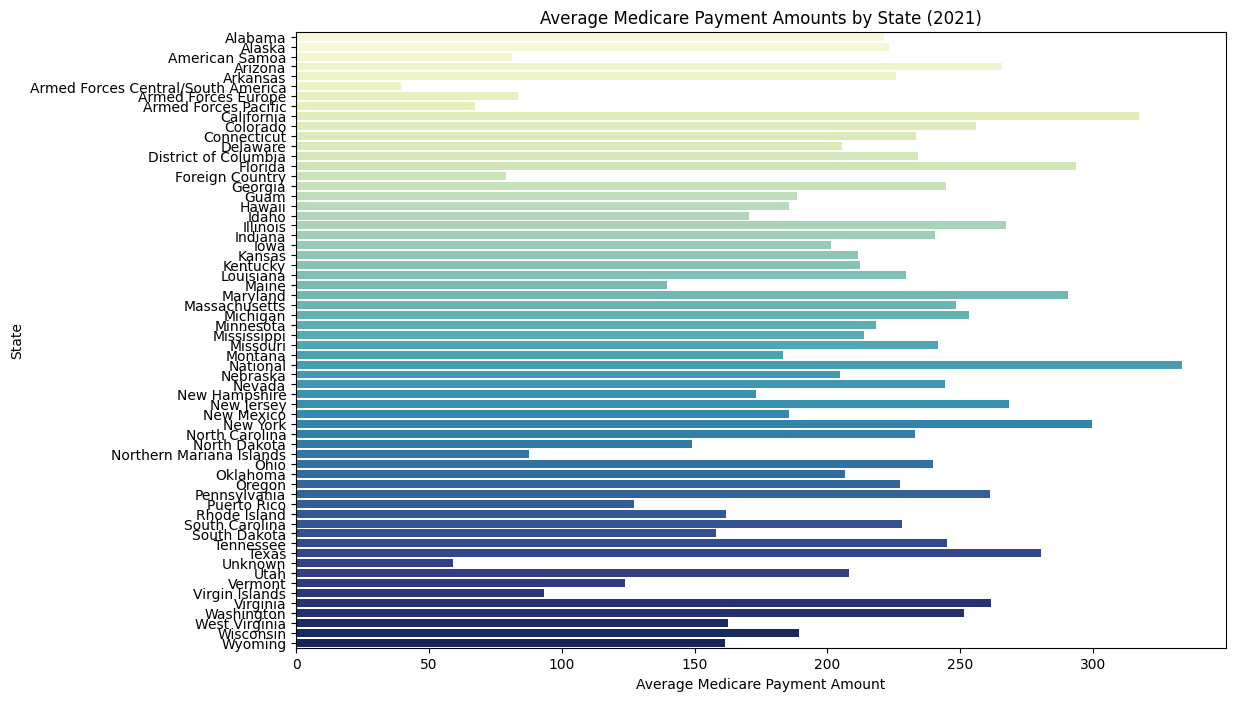

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by state for the year 2021
state_payments_21 = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')
plt.title('Average Medicare Payment Amounts by State (2021)')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('State')
plt.show()


<ipython-input-10-fb565e8a0250>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')


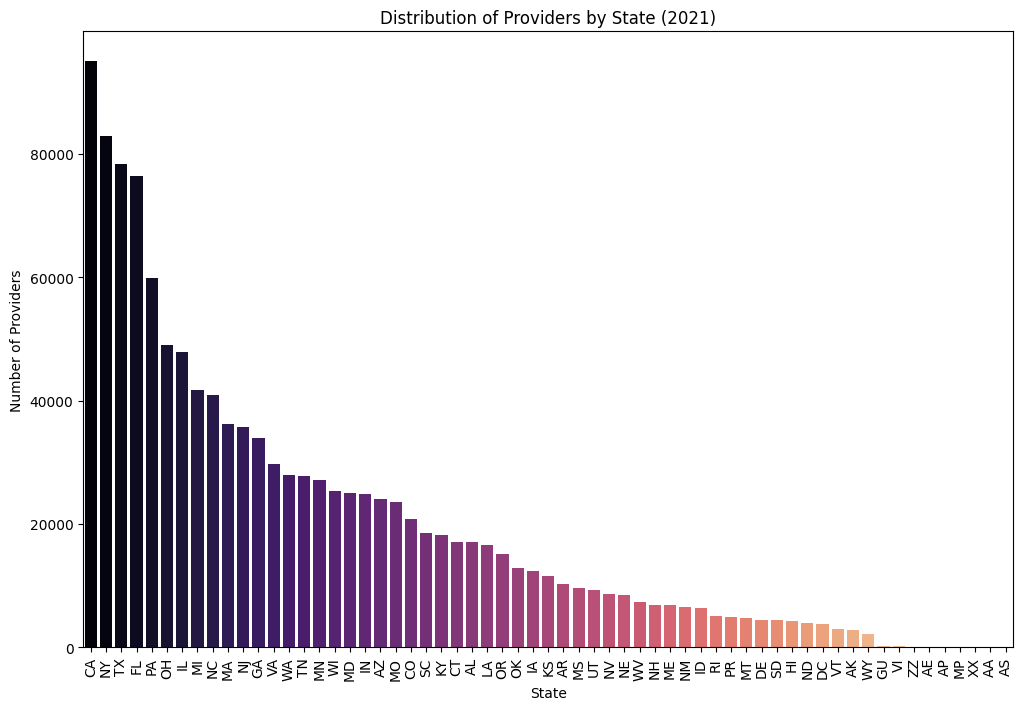

In [ ]:
import scipy.stats as stats

# Statistical analysis on average Medicare payment amounts by state
state_payment_stats = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].agg(['mean', 'std', 'count'])
state_payment_stats['sem'] = state_payment_stats['std'] / state_payment_stats['count'] ** 0.5

# Identify states with significantly higher or lower payments
mean_payment = state_payment_stats['mean'].mean()
std_payment = state_payment_stats['mean'].std()

high_payment_states = state_payment_stats[state_payment_stats['mean'] > mean_payment + std_payment]
low_payment_states = state_payment_stats[state_payment_stats['mean'] < mean_payment - std_payment]

print("States with significantly higher average Medicare payments:")
print(high_payment_states)

print("\nStates with significantly lower average Medicare payments:")
print(low_payment_states)


States with significantly higher average Medicare payments:
                             mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                          
California             317.278458  710.486064   9003   7.487933
Florida                293.436699  697.499777   8413   7.604464
Maryland               290.662873  788.339023   6001  10.176565
National               333.321047  669.187763  13282   5.806524
New York               299.385368  700.894414   7774   7.949326
Texas                  280.482001  667.456065   8202   7.369920

States with significantly lower average Medicare payments:
                                          mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                                       
American Samoa                       81.460217   35.587242      3  20.546304
Armed Forces Central/South America   39.634567   33.259840    141   2.800984
Armed Forces Europe                  83.710838  148.141502  

<ipython-input-14-75cc77aa29cb>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='HCPCS_Cd', data=top_services_21, palette='viridis')


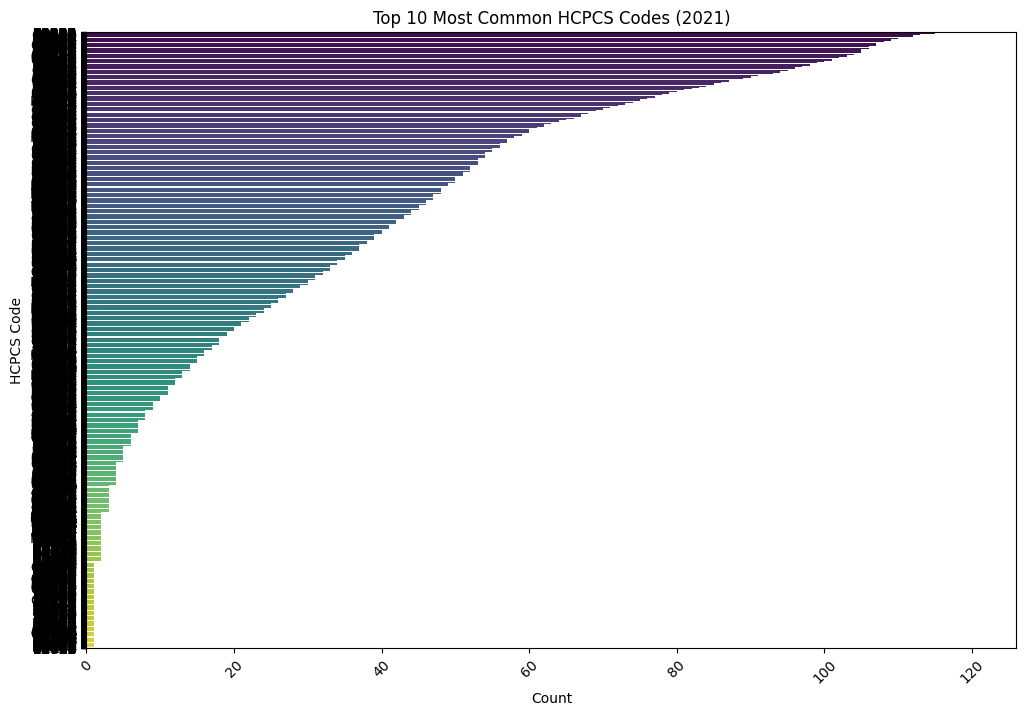

In [ ]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate data for the most common services (HCPCS codes) for 2021
top_services_21 = geo_data_21['HCPCS_Cd'].value_counts().reset_index()
top_services_21.columns = ['HCPCS_Cd', 'Count']

# Plotting the top 10 most common HCPCS codes
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='HCPCS_Cd', data=top_services_21, palette='viridis')
plt.title('Top 10 Most Common HCPCS Codes (2021)')
plt.xlabel('Count')
plt.ylabel('HCPCS Code')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-3b88d746a38f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='HCPCS_Desc', data=top_services_with_desc, palette='viridis')


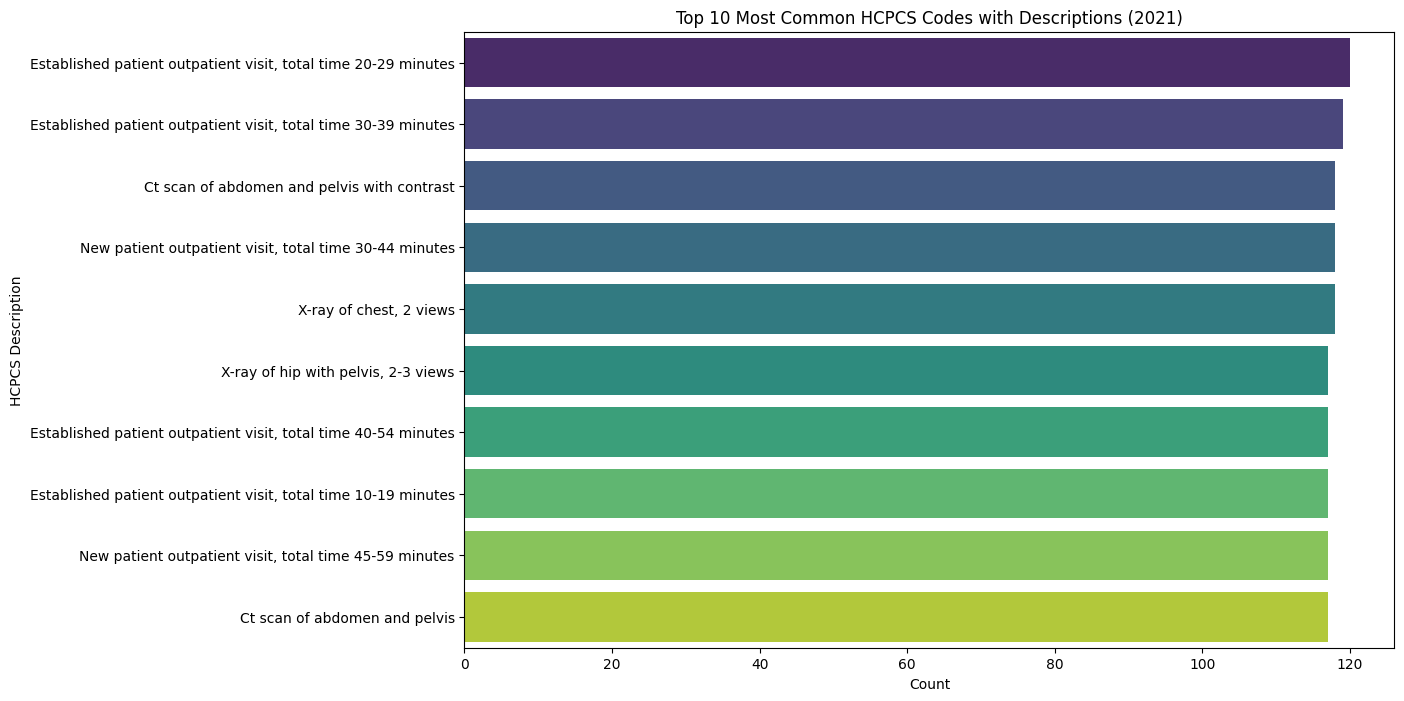

  HCPCS_Cd  Count                                         HCPCS_Desc
0    99213    120  Established patient outpatient visit, total ti...
1    99214    119  Established patient outpatient visit, total ti...
2    74177    118        Ct scan of abdomen and pelvis with contrast
3    99203    118  New patient outpatient visit, total time 30-44...
4    71046    118                            X-ray of chest, 2 views
5    73502    117                X-ray of hip with pelvis, 2-3 views
6    99215    117  Established patient outpatient visit, total ti...
7    99212    117  Established patient outpatient visit, total ti...
8    99204    117  New patient outpatient visit, total time 45-59...
9    74176    117                      Ct scan of abdomen and pelvis


In [ ]:

# Aggregate data for the most common services (HCPCS codes) for 2021
top_services_21_series = geo_data_21['HCPCS_Cd'].value_counts().head(10)  # Get the top 10 most common HCPCS codes
top_services_21 = top_services_21_series.reset_index()  # Reset the index to convert Series to DataFrame
top_services_21.columns = ['HCPCS_Cd', 'Count']  # Rename columns for clarity

# Extract descriptions for the top HCPCS codes
top_services_with_desc = pd.merge(top_services_21, geo_data_21[['HCPCS_Cd', 'HCPCS_Desc']].drop_duplicates(), on='HCPCS_Cd')

# Plotting the top 10 most common HCPCS codes with descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='HCPCS_Desc', data=top_services_with_desc, palette='viridis')
plt.title('Top 10 Most Common HCPCS Codes with Descriptions (2021)')
plt.xlabel('Count')
plt.ylabel('HCPCS Description')
plt.show()

# Display the top 10 HCPCS codes with descriptions
print(top_services_with_desc)


<ipython-input-16-16896c9c08ce>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Geo.csv', encoding='latin1')
<ipython-input-16-16896c9c08ce>:7: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Prov.csv', encoding='latin1')
<ipython-input-16-16896c9c08ce>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tot_Srvcs', y='HCPCS_Desc', data=top_services_with_desc, palette='viridis')


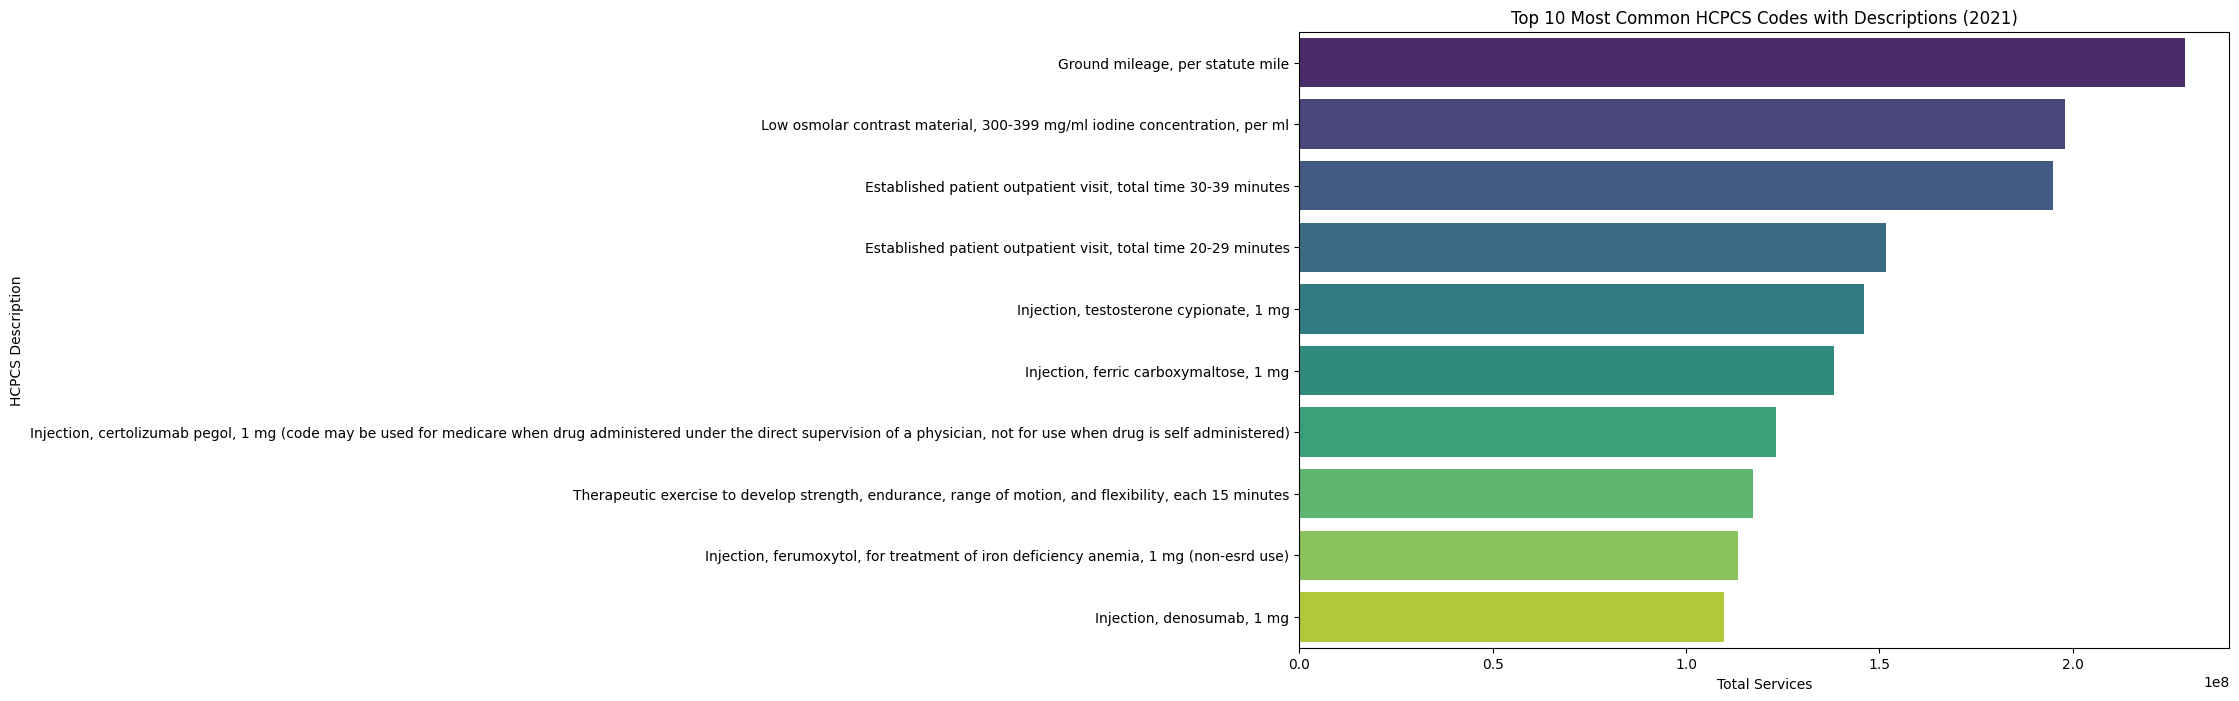

  HCPCS_Cd    Tot_Srvcs                                         HCPCS_Desc
0    A0425  229064738.2                   Ground mileage, per statute mile
1    Q9967  198044291.8  Low osmolar contrast material, 300-399 mg/ml i...
2    99214  195040647.8  Established patient outpatient visit, total ti...
3    99213  151643434.4  Established patient outpatient visit, total ti...
4    J1071  146042729.8            Injection, testosterone cypionate, 1 mg
5    J1439  138261651.0             Injection, ferric carboxymaltose, 1 mg
6    J0717  123394894.0  Injection, certolizumab pegol, 1 mg (code may ...
7    97110  117446759.8  Therapeutic exercise to develop strength, endu...
8    Q0138  113404296.0  Injection, ferumoxytol, for treatment of iron ...
9    J0897  109849345.2                         Injection, denosumab, 1 mg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Geo.csv', encoding='latin1')
prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Prov.csv', encoding='latin1')

# Aggregate data for the most common services (HCPCS codes) based on the total number of services
top_services_21 = geo_data_21.groupby('HCPCS_Cd')['Tot_Srvcs'].sum().reset_index()
top_services_21 = top_services_21.sort_values(by='Tot_Srvcs', ascending=False).head(10)

# Extract descriptions for the top HCPCS codes
top_services_with_desc = pd.merge(top_services_21, geo_data_21[['HCPCS_Cd', 'HCPCS_Desc']].drop_duplicates(), on='HCPCS_Cd')

# Plotting the top 10 most common HCPCS codes with descriptions
plt.figure(figsize=(12, 8))
sns.barplot(x='Tot_Srvcs', y='HCPCS_Desc', data=top_services_with_desc, palette='viridis')
plt.title('Top 10 Most Common HCPCS Codes with Descriptions (2021)')
plt.xlabel('Total Services')
plt.ylabel('HCPCS Description')
plt.show()

# Display the top 10 HCPCS codes with descriptions
print(top_services_with_desc)


In [ ]:
# Inspect the column with specialty information
print(prov_data_21['Rndrng_Prvdr_Type'].unique())

['Internal Medicine' 'Pathology' 'Anesthesiology'
 'Obstetrics & Gynecology' 'General Surgery' 'Urology' 'Cardiac Surgery'
 'Nurse Practitioner' 'Physician Assistant'
 'Licensed Clinical Social Worker'
 'Physical Therapist in Private Practice' 'Family Practice' 'Cardiology'
 'Certified Registered Nurse Anesthetist (CRNA)' 'Optometry'
 'Mass Immunizer Roster Biller' 'Pain Management'
 'Physical Medicine and Rehabilitation' 'Radiation Oncology'
 'Infectious Disease' 'Orthopedic Surgery' 'Endocrinology' 'Chiropractic'
 'Diagnostic Radiology' 'Centralized Flu' 'Rheumatology' 'Neurology'
 'Emergency Medicine' 'Dermatology' 'Nephrology' 'Ophthalmology'
 'Pulmonary Disease' 'Pharmacy' 'Otolaryngology' 'Psychologist, Clinical'
 'General Practice' 'Ambulance Service Provider'
 'Plastic and Reconstructive Surgery' 'Psychiatry'
 'Interventional Cardiology' 'Gastroenterology' 'Hospitalist'
 'Audiologist' 'Geriatric Medicine'
 'Occupational Therapist in Private Practice' 'Neurosurgery'
 'Critical C

In [ ]:
import pandas as pd

# Load data
geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Geo.csv', encoding='latin1')
prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Prov.csv', encoding='latin1')

# Inspect column names
print("geo_data_21 columns:")
print(geo_data_21.columns)

print("\nprov_data_21 columns:")
print(prov_data_21.columns)

# Check for common columns
common_columns = set(geo_data_21.columns).intersection(set(prov_data_21.columns))
print("\nCommon columns between geo_data_21 and prov_data_21:")
print(common_columns)



<ipython-input-31-3137b19bef98>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  geo_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Geo.csv', encoding='latin1')
<ipython-input-31-3137b19bef98>:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  prov_data_21 = pd.read_csv('drive/MyDrive/CMS/MUP_PHY_R23_P05_V10_D21_Prov.csv', encoding='latin1')


geo_data_21 columns:
Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc',
       'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt',
       'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

prov_data_21 columns:
Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug

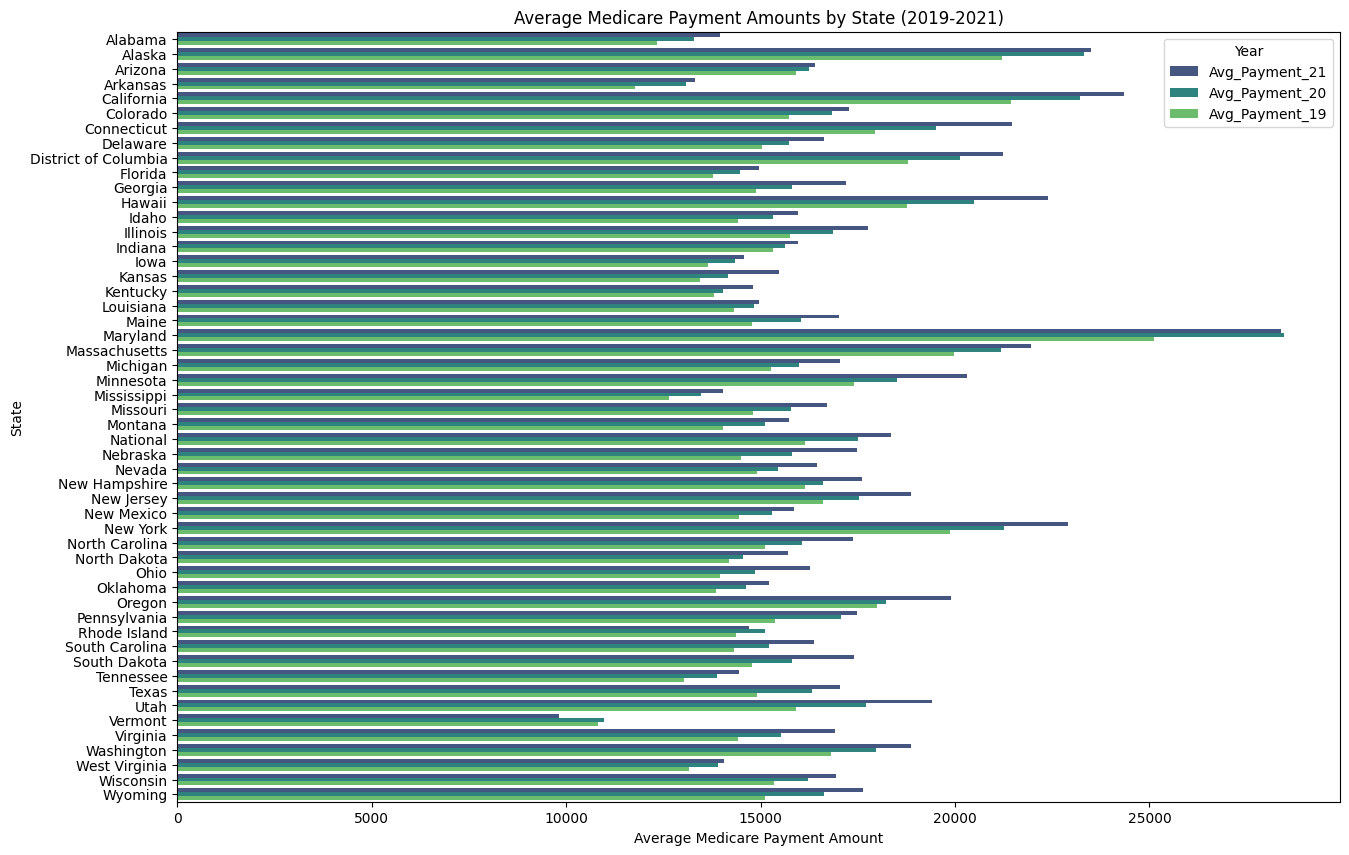

In [ ]:
# Aggregate data by state for each year
state_payments_21 = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()
state_payments_20 = geo_data_20.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()
state_payments_19 = geo_data_19.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Merge dataframes to compare over years
state_payments = state_payments_21.merge(state_payments_20, on='Rndrng_Prvdr_Geo_Desc', suffixes=('_21', '_20'))
state_payments = state_payments.merge(state_payments_19, on='Rndrng_Prvdr_Geo_Desc')
state_payments.columns = ['State', 'Avg_Payment_21', 'Avg_Payment_20', 'Avg_Payment_19']

# Plotting
plt.figure(figsize=(15, 10))
state_payments_melt = state_payments.melt(id_vars=["State"], var_name="Year", value_name="Average Payment")
sns.barplot(x='Average Payment', y='State', hue='Year', data=state_payments_melt, palette='viridis')
plt.title('Average Medicare Payment Amounts by State (2019-2021)')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('State')
plt.show()


<ipython-input-24-c153ddcc1b50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')


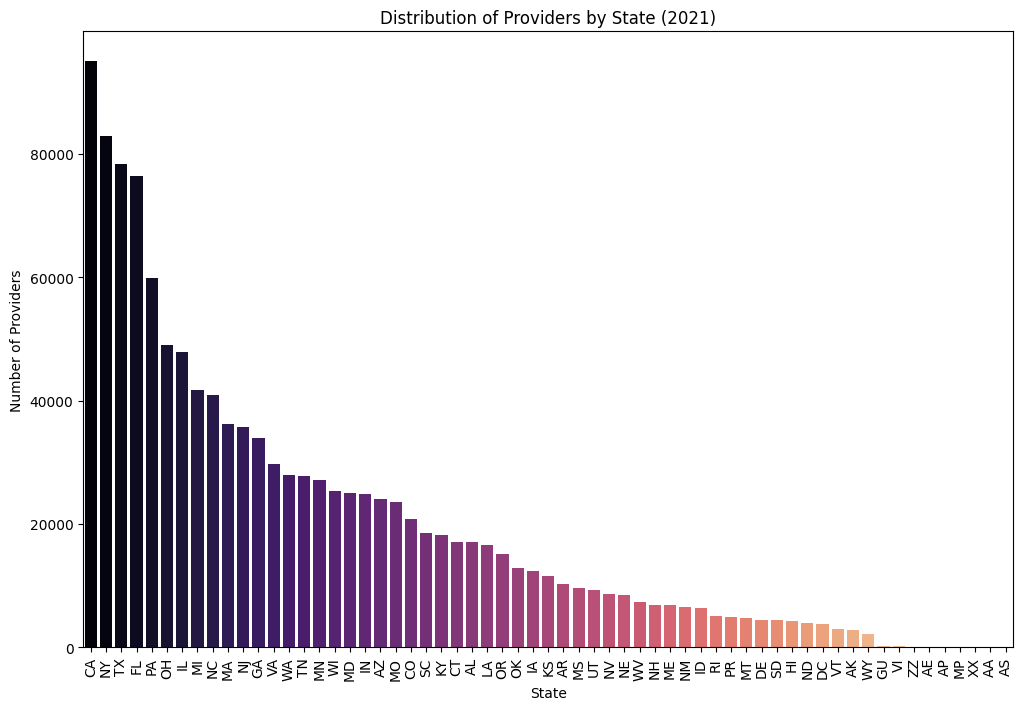

<ipython-input-24-c153ddcc1b50>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity Type', y='Count', data=provider_type_distribution, palette='coolwarm')


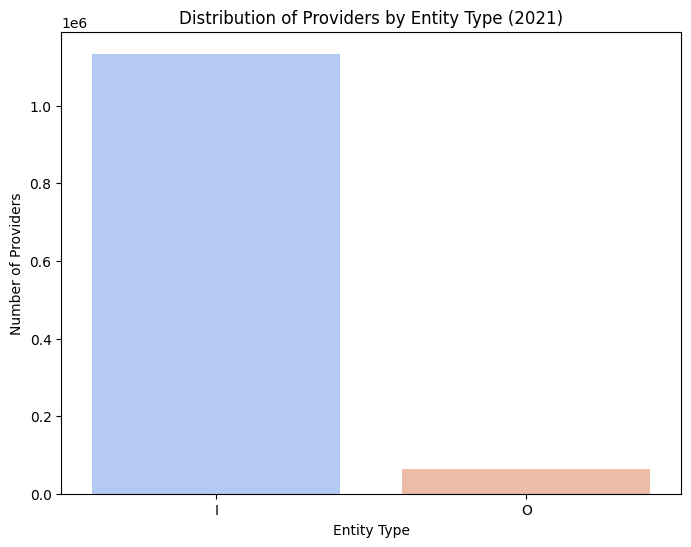

In [ ]:
# Aggregate data for provider distribution by state
provider_distribution_21 = prov_data_21['Rndrng_Prvdr_State_Abrvtn'].value_counts().reset_index()
provider_distribution_21.columns = ['State', 'Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')
plt.title('Distribution of Providers by State (2021)')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=90)
plt.show()

# Analyze the distribution by type (individuals vs. organizations)
provider_type_distribution = prov_data_21['Rndrng_Prvdr_Ent_Cd'].value_counts().reset_index()
provider_type_distribution.columns = ['Entity Type', 'Count']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Entity Type', y='Count', data=provider_type_distribution, palette='coolwarm')
plt.title('Distribution of Providers by Entity Type (2021)')
plt.xlabel('Entity Type')
plt.ylabel('Number of Providers')
plt.show()


<ipython-input-25-c768c357582b>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Year', y='Avg_Mdcr_Pymt_Amt', data=yearly_payments, marker='o', palette='muted')


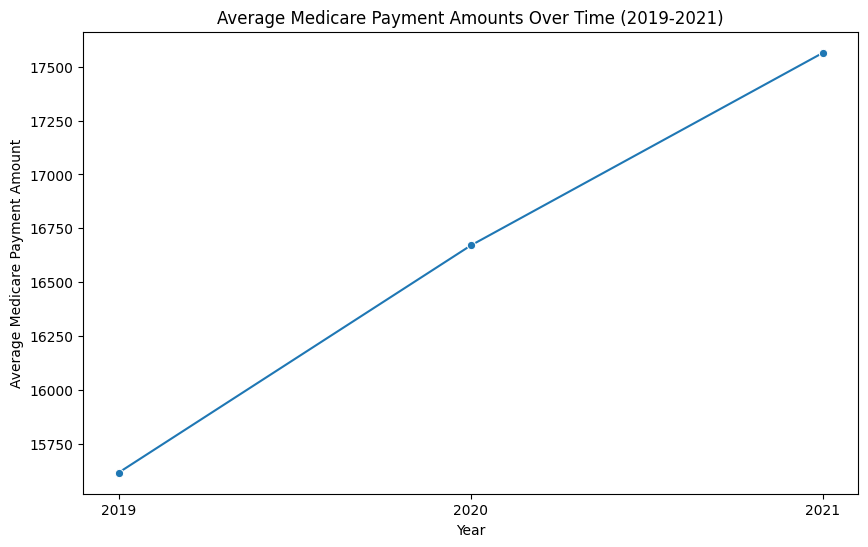

In [ ]:
# Load and combine data
geo_data_combined = pd.concat([geo_data_21, geo_data_20, geo_data_19], keys=['2021', '2020', '2019']).reset_index(level=0).rename(columns={'level_0': 'Year'})

# Aggregate data by year
yearly_payments = geo_data_combined.groupby('Year')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Avg_Mdcr_Pymt_Amt', data=yearly_payments, marker='o', palette='muted')
plt.title('Average Medicare Payment Amounts Over Time (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Average Medicare Payment Amount')
plt.show()


<ipython-input-2-a4e2d76e7840>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')


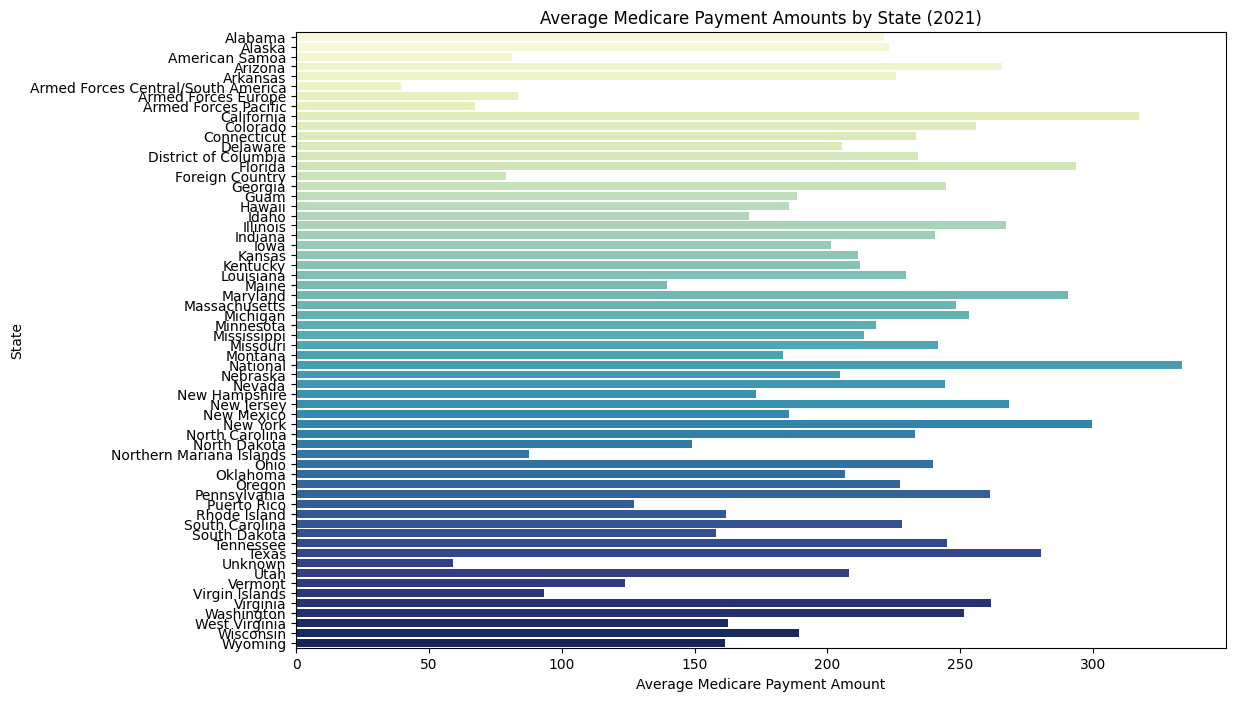

Rndrng_Prvdr_Geo_Desc  Avg_Mdcr_Pymt_Amt
0                Alabama         221.170332
1                 Alaska         223.195515
2         American Samoa          81.460217
3                Arizona         265.674029
4               Arkansas         225.739402
..                   ...                ...
57              Virginia         261.548961
58            Washington         251.200002
59         West Virginia         162.614379
60             Wisconsin         189.220494
61               Wyoming         161.554392

[62 rows x 2 columns]

In [ ]:
# Aggregate data by state for the year 2021
state_payments_21 = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='Rndrng_Prvdr_Geo_Desc', data=state_payments_21, palette='YlGnBu')
plt.title('Average Medicare Payment Amounts by State (2021)')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('State')
plt.show()

# Display the state payments
state_payments_21


<ipython-input-4-9889fa9b749d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')


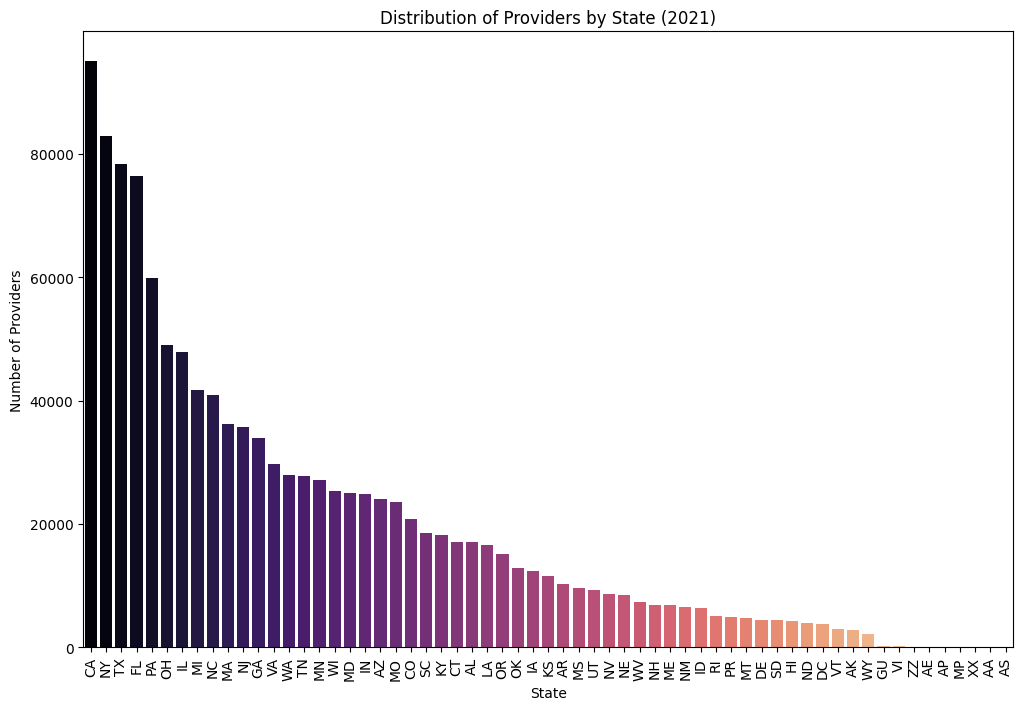

State  Count
0     CA  95079
1     NY  82825
2     TX  78353
3     FL  76464
4     PA  59819
..   ...    ...
56    AP     41
57    MP     33
58    XX     31
59    AA     13
60    AS      1

[61 rows x 2 columns]

In [ ]:
# Aggregate data for provider distribution by state
provider_distribution_21 = prov_data_21['Rndrng_Prvdr_State_Abrvtn'].value_counts().reset_index()
provider_distribution_21.columns = ['State', 'Count']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Count', data=provider_distribution_21, palette='magma')
plt.title('Distribution of Providers by State (2021)')
plt.xlabel('State')
plt.ylabel('Number of Providers')
plt.xticks(rotation=90)
plt.show()

# Display the provider distribution
provider_distribution_21


In [ ]:
import scipy.stats as stats

# Statistical analysis on average Medicare payment amounts by state
state_payment_stats = geo_data_21.groupby('Rndrng_Prvdr_Geo_Desc')['Avg_Mdcr_Pymt_Amt'].agg(['mean', 'std', 'count'])
state_payment_stats['sem'] = state_payment_stats['std'] / state_payment_stats['count'] ** 0.5

# Identify states with significantly higher or lower payments
mean_payment = state_payment_stats['mean'].mean()
std_payment = state_payment_stats['mean'].std()

high_payment_states = state_payment_stats[state_payment_stats['mean'] > mean_payment + std_payment]
low_payment_states = state_payment_stats[state_payment_stats['mean'] < mean_payment - std_payment]

print("States with significantly higher average Medicare payments:")
print(high_payment_states)

print("\nStates with significantly lower average Medicare payments:")
print(low_payment_states)


States with significantly higher average Medicare payments:
                             mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                          
California             317.278458  710.486064   9003   7.487933
Florida                293.436699  697.499777   8413   7.604464
Maryland               290.662873  788.339023   6001  10.176565
National               333.321047  669.187763  13282   5.806524
New York               299.385368  700.894414   7774   7.949326
Texas                  280.482001  667.456065   8202   7.369920

States with significantly lower average Medicare payments:
                                          mean         std  count        sem
Rndrng_Prvdr_Geo_Desc                                                       
American Samoa                       81.460217   35.587242      3  20.546304
Armed Forces Central/South America   39.634567   33.259840    141   2.800984
Armed Forces Europe                  83.710838  148.141502  

In [ ]:
# Verify column names of geo_data_21
print(geo_data_21.columns)

# Verify column names of other datasets
print(geo_data_20.columns)
print(prov_data_21.columns)


Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'HCPCS_Cd', 'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc',
       'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs',
       'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt',
       'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')
Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Cd', 'Rndrng_Prvdr_Geo_Desc',
       'DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg',
       'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt'],
      dtype='object')
Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rnd

In [ ]:
# Identify top DRGs by total payment amount in 2021
top_drgs_20 = geo_data_20.groupby('DRG_Cd')['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Display the top DRGs
print(top_drgs_20)


     DRG_Cd  Avg_Mdcr_Pymt_Amt
0         1       8.396400e+06
2         3       7.677455e+06
3         4       4.732032e+06
173     215       4.140347e+06
12       14       3.586508e+06
174     216       3.582761e+06
13       16       3.408673e+06
366     453       3.188073e+06
17       20       3.092294e+06
177     219       3.055783e+06


<ipython-input-24-84b73659e75e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', data=top_drgs_19, palette='coolwarm')


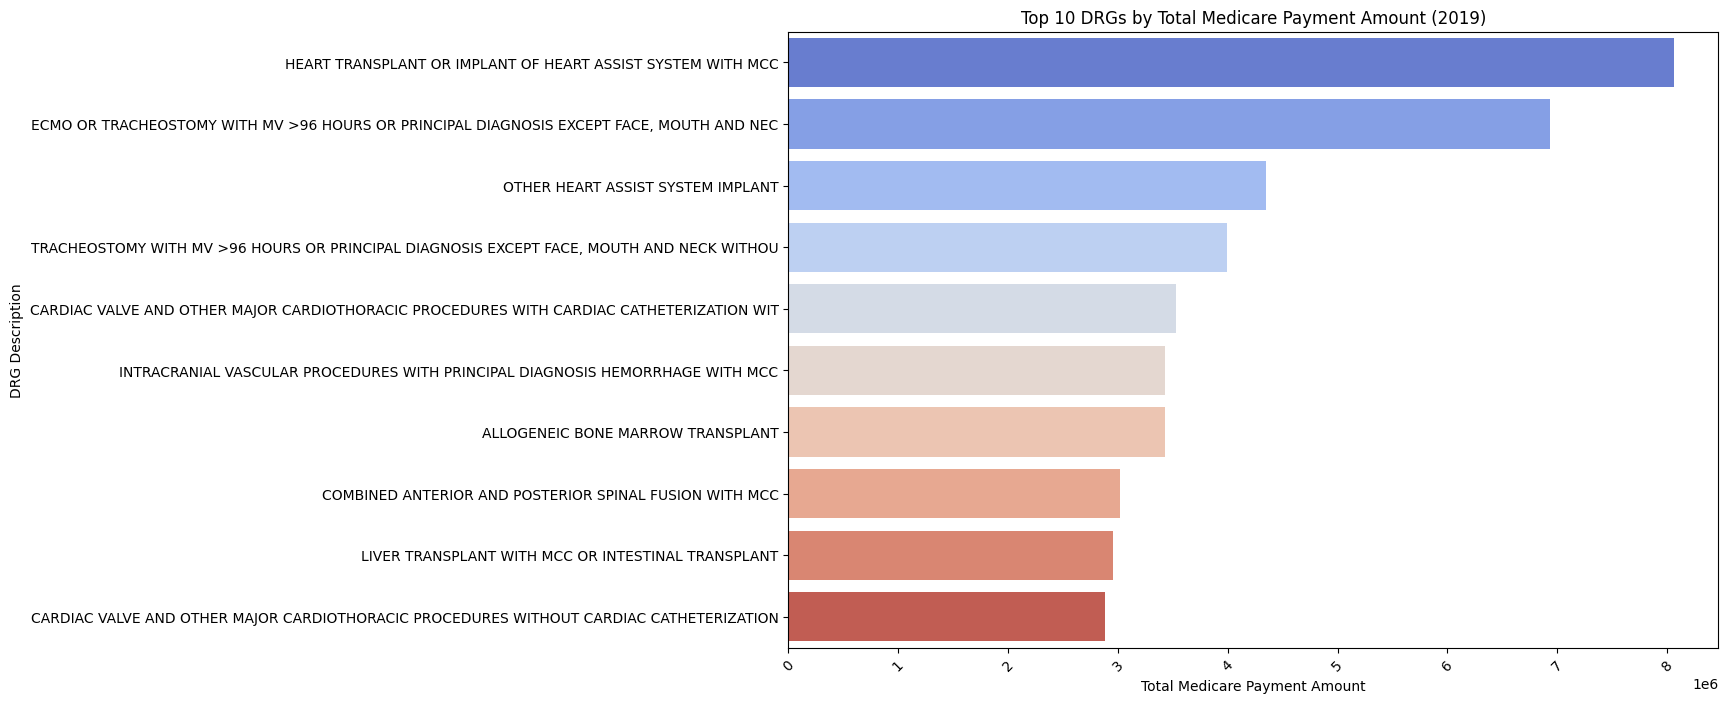

DRG_Cd                                           DRG_Desc  \
0         1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...   
2         3  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...   
165     215                  OTHER HEART ASSIST SYSTEM IMPLANT   
3         4  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...   
166     216  CARDIAC VALVE AND OTHER MAJOR CARDIOTHORACIC P...   
15       20  INTRACRANIAL VASCULAR PROCEDURES WITH PRINCIPA...   
12       14                  ALLOGENEIC BONE MARROW TRANSPLANT   
358     453  COMBINED ANTERIOR AND POSTERIOR SPINAL FUSION ...   
4         5  LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...   
169     219  CARDIAC VALVE AND OTHER MAJOR CARDIOTHORACIC P...   

     Avg_Mdcr_Pymt_Amt  
0         8.062343e+06  
2         6.937098e+06  
165       4.349803e+06  
3         3.996505e+06  
166       3.527859e+06  
15        3.427641e+06  
12        3.425161e+06  
358       3.019142e+06  
4         2.958536e+06  
169       2.883675e+06

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by DRG code and description
top_drgs_19 = geo_data_19.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Plotting the top 10 DRGs by total payment amount
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', data=top_drgs_19, palette='coolwarm')
plt.title('Top 10 DRGs by Total Medicare Payment Amount (2019)')
plt.xlabel('Total Medicare Payment Amount')
plt.ylabel('DRG Description')
plt.xticks(rotation=45)
plt.show()

# Display the data used for verification
top_drgs_19

<ipython-input-15-6b82e6ebccf5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', data=top_drgs_20, palette='coolwarm')


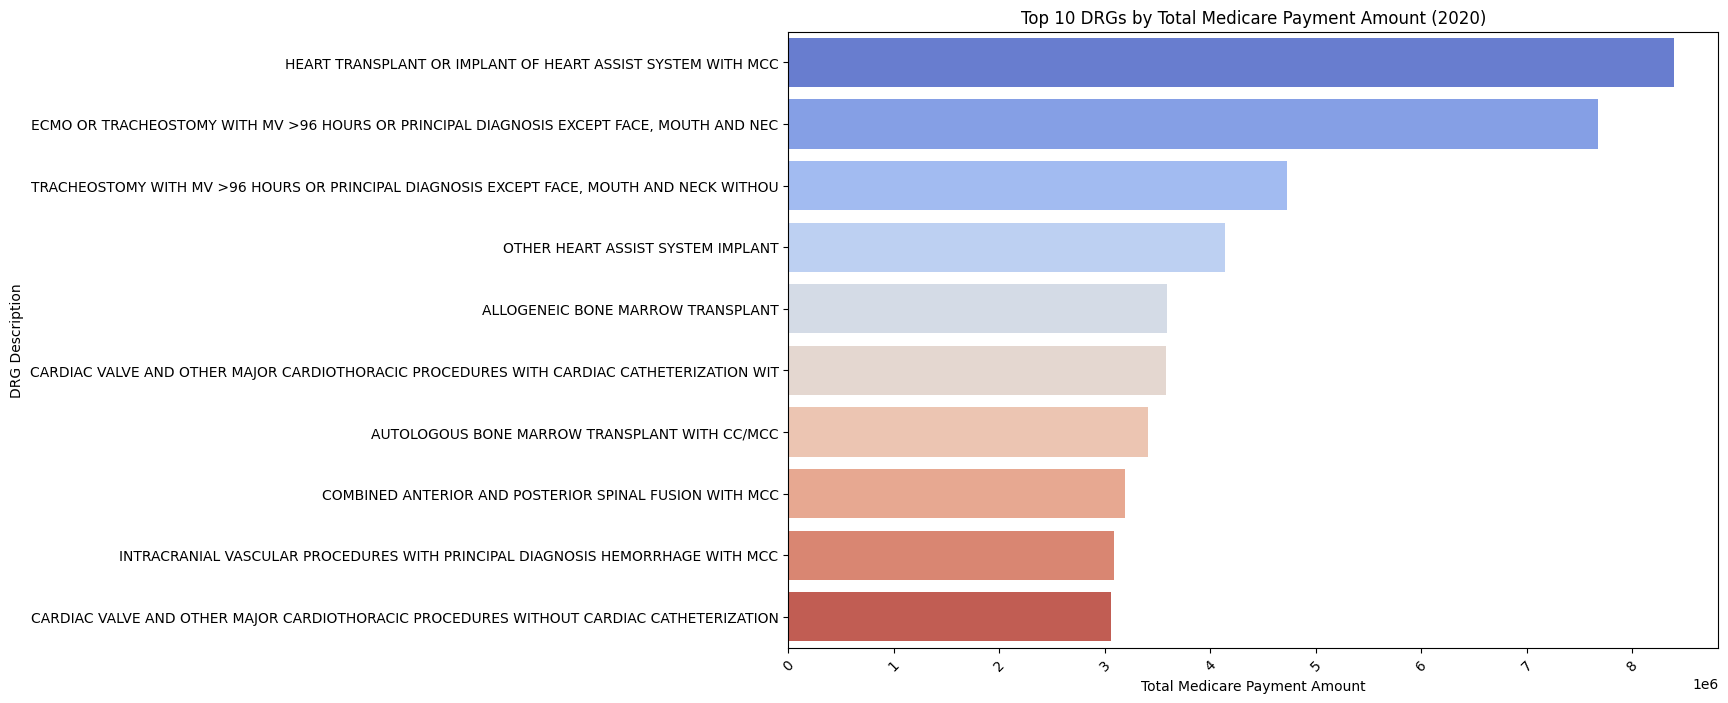

DRG_Cd                                           DRG_Desc  \
0         1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...   
2         3  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...   
3         4  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...   
173     215                  OTHER HEART ASSIST SYSTEM IMPLANT   
12       14                  ALLOGENEIC BONE MARROW TRANSPLANT   
174     216  CARDIAC VALVE AND OTHER MAJOR CARDIOTHORACIC P...   
13       16      AUTOLOGOUS BONE MARROW TRANSPLANT WITH CC/MCC   
366     453  COMBINED ANTERIOR AND POSTERIOR SPINAL FUSION ...   
17       20  INTRACRANIAL VASCULAR PROCEDURES WITH PRINCIPA...   
177     219  CARDIAC VALVE AND OTHER MAJOR CARDIOTHORACIC P...   

     Avg_Mdcr_Pymt_Amt  
0         8.396400e+06  
2         7.677455e+06  
3         4.732032e+06  
173       4.140347e+06  
12        3.586508e+06  
174       3.582761e+06  
13        3.408673e+06  
366       3.188073e+06  
17        3.092294e+06  
177       3.055783e+06

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'DRG_Cd' and 'DRG_Desc' are in geo_data_20
# Group by DRG code and description
top_drgs_20 = geo_data_20.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Plotting the top 10 DRGs by total payment amount
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', data=top_drgs_20, palette='coolwarm')
plt.title('Top 10 DRGs by Total Medicare Payment Amount (2020)')
plt.xlabel('Total Medicare Payment Amount')
plt.ylabel('DRG Description')
plt.xticks(rotation=45)
plt.show()

# Display the data used for verification
top_drgs_20


<ipython-input-14-cc7dff6ef649>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', data=top_drgs_21, palette='coolwarm')


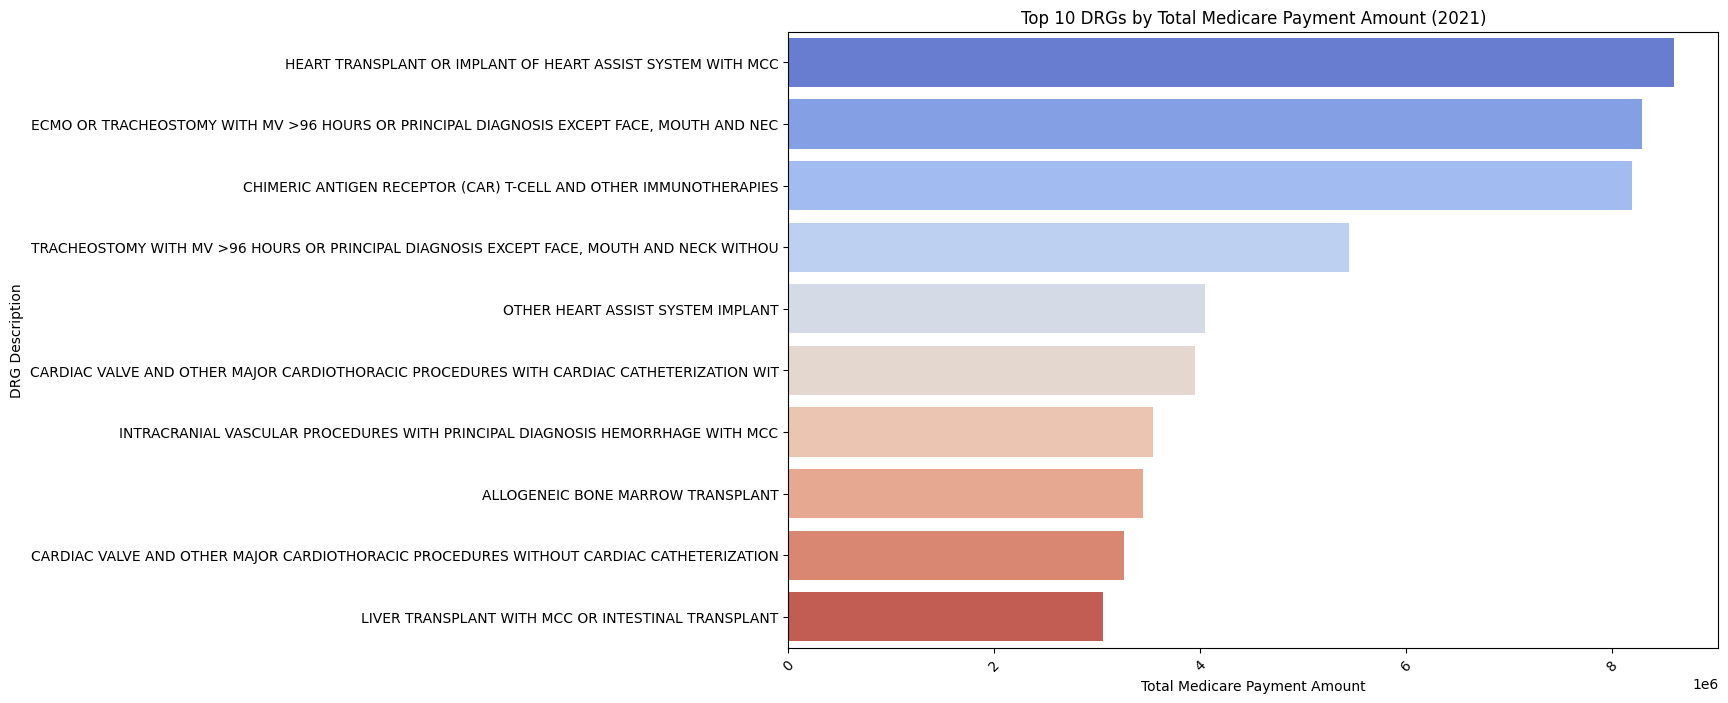

DRG_Cd                                           DRG_Desc  \
0         1  HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...   
2         3  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...   
15       18  CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...   
3         4  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...   
167     215                  OTHER HEART ASSIST SYSTEM IMPLANT   
168     216  CARDIAC VALVE AND OTHER MAJOR CARDIOTHORACIC P...   
17       20  INTRACRANIAL VASCULAR PROCEDURES WITH PRINCIPA...   
12       14                  ALLOGENEIC BONE MARROW TRANSPLANT   
171     219  CARDIAC VALVE AND OTHER MAJOR CARDIOTHORACIC P...   
4         5  LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...   

     Avg_Mdcr_Pymt_Amt  
0         8.598309e+06  
2         8.287261e+06  
15        8.194451e+06  
3         5.443946e+06  
167       4.045243e+06  
168       3.946065e+06  
17        3.543405e+06  
12        3.440875e+06  
171       3.254771e+06  
4         3.053156e+06

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'DRG_Cd' and 'DRG_Desc' are in geo_data_20
# Group by DRG code and description
top_drgs_21 = geo_data_21.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Plotting the top 10 DRGs by total payment amount
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', data=top_drgs_21, palette='coolwarm')
plt.title('Top 10 DRGs by Total Medicare Payment Amount (2021)')
plt.xlabel('Total Medicare Payment Amount')
plt.ylabel('DRG Description')
plt.xticks(rotation=45)
plt.show()

# Display the data used for verification
top_drgs_21


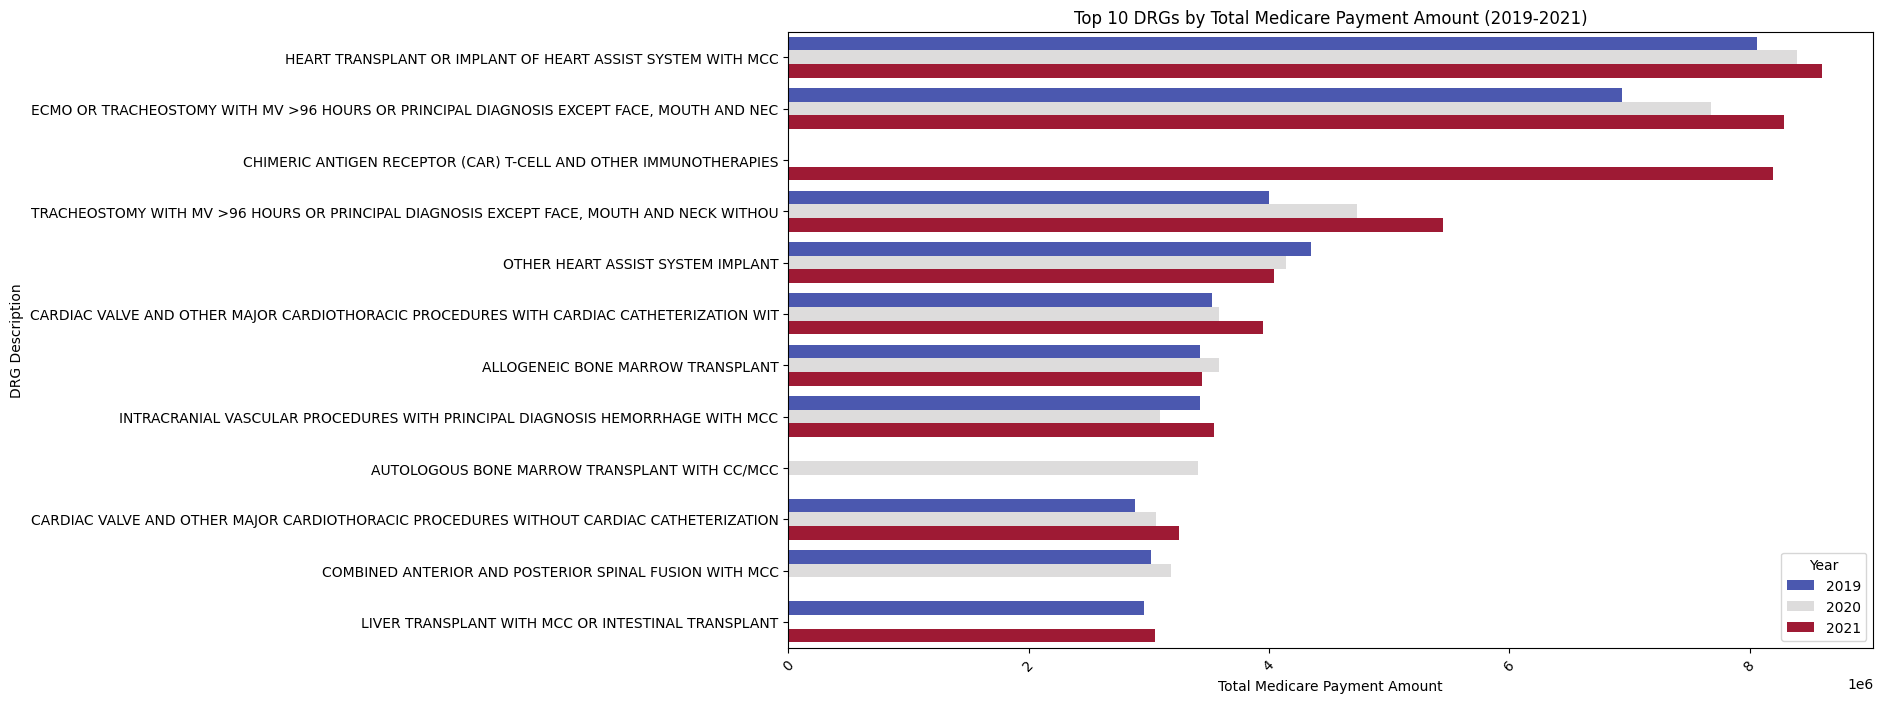

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data for each year
top_drgs_19 = geo_data_19.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index()
top_drgs_20 = geo_data_20.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index()
top_drgs_21 = geo_data_21.groupby(['DRG_Cd', 'DRG_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index()

# Add a column for the year
top_drgs_19['Year'] = 2019
top_drgs_20['Year'] = 2020
top_drgs_21['Year'] = 2021

# Concatenate data for all years
top_drgs_combined = pd.concat([top_drgs_19, top_drgs_20, top_drgs_21])

# Filter top 10 DRGs for each year
top_drgs_combined = top_drgs_combined.sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).groupby('Year').head(10)

# Plotting the combined data
plt.figure(figsize=(14, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='DRG_Desc', hue='Year', data=top_drgs_combined, palette='coolwarm')
plt.title('Top 10 DRGs by Total Medicare Payment Amount (2019-2021)')
plt.xlabel('Total Medicare Payment Amount')
plt.ylabel('DRG Description')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


<ipython-input-20-a35f747d10a4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading


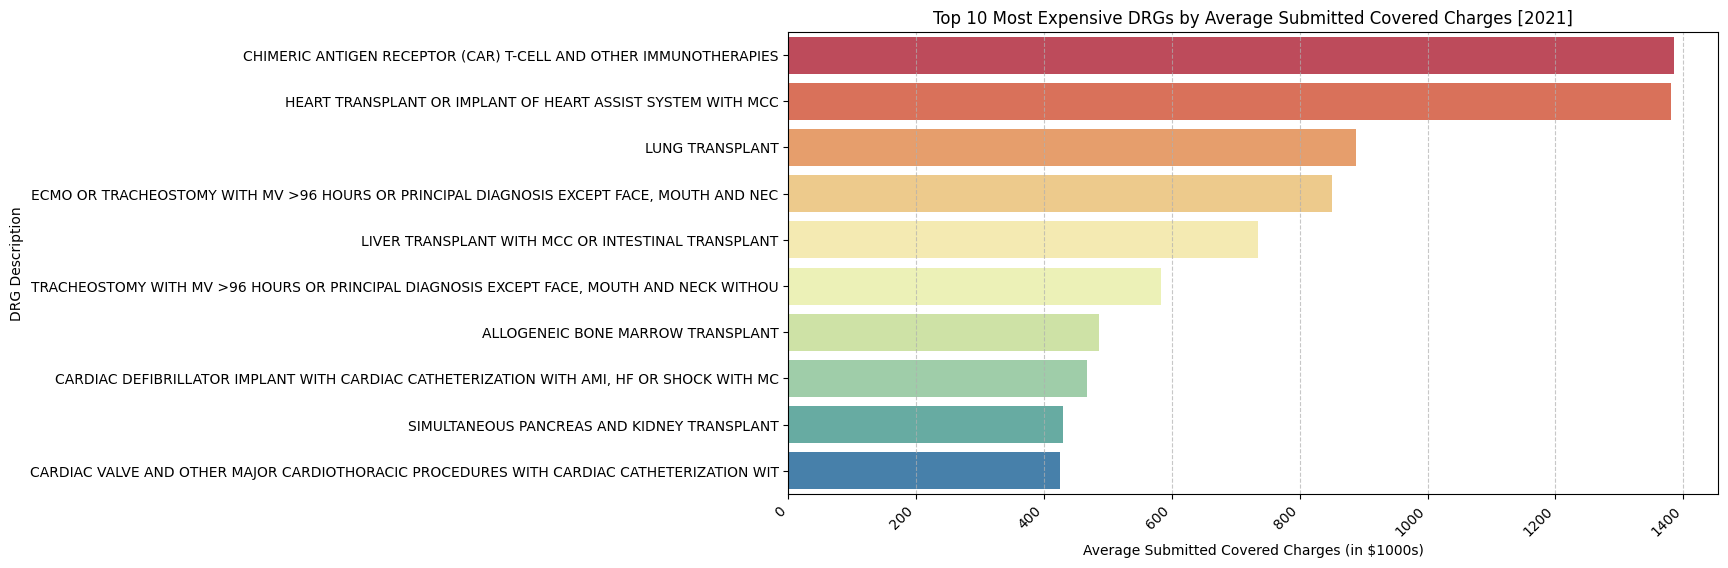

DRG_Desc
CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTHER IMMUNOTHERAPIES                            1.385521e+06
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM WITH MCC                                 1.380203e+06
LUNG TRANSPLANT                                                                             8.886796e+05
ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NEC    8.508749e+05
LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSPLANT                                          7.351425e+05
Name: Avg_Submtd_Cvrd_Chrg, dtype: float64

In [20]:
# Let's attempt to execute the code provided after reloading and checking data once more.
# Reloading the CSV file to handle possible issues
# ranking top DRGs in provider+service data, moving on from geography+service
#data = pd.read_csv('drive/MyDrive/CMS/MUP_IHP_RY23_P03_V10_DY21_PRVSVC.CSV', encoding='ISO-8859-1')

# Selecting the top 10 most expensive DRGs based on Average Submitted Covered Charges
top_expensive_drgs = prov_data_21.groupby('DRG_Desc')['Avg_Submtd_Cvrd_Chrg'].mean().nlargest(10)

# Creating a bar chart for the top 10 most expensive DRGs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading
plt.title('Top 10 Most Expensive DRGs by Average Submitted Covered Charges [2021]')
plt.xlabel('Average Submitted Covered Charges (in $1000s)')
plt.ylabel('DRG Description')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the top expensive DRGs for review
top_expensive_drgs.head()



<ipython-input-19-62edc7969d61>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading


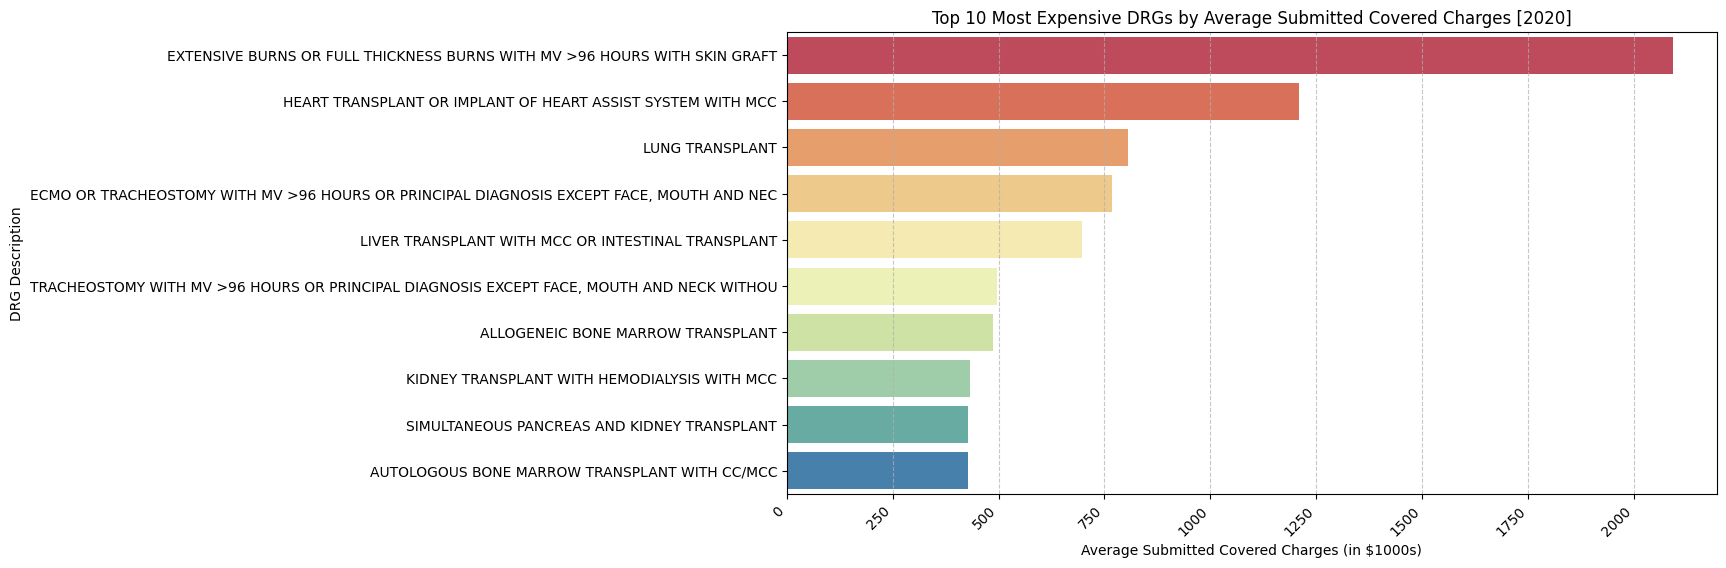

DRG_Desc
EXTENSIVE BURNS OR FULL THICKNESS BURNS WITH MV >96 HOURS WITH SKIN GRAFT                   2.091633e+06
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM WITH MCC                                 1.208855e+06
LUNG TRANSPLANT                                                                             8.043673e+05
ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NEC    7.668906e+05
LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSPLANT                                          6.964245e+05
Name: Avg_Submtd_Cvrd_Chrg, dtype: float64

In [19]:
# Selecting the top 10 most expensive DRGs based on Average Submitted Covered Charges
top_expensive_drgs = prov_data_20.groupby('DRG_Desc')['Avg_Submtd_Cvrd_Chrg'].mean().nlargest(10)

# Creating a bar chart for the top 10 most expensive DRGs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading
plt.title('Top 10 Most Expensive DRGs by Average Submitted Covered Charges [2020]')
plt.xlabel('Average Submitted Covered Charges (in $1000s)')
plt.ylabel('DRG Description')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the top expensive DRGs for review
top_expensive_drgs.head()

<ipython-input-22-f12e7848fd19>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading


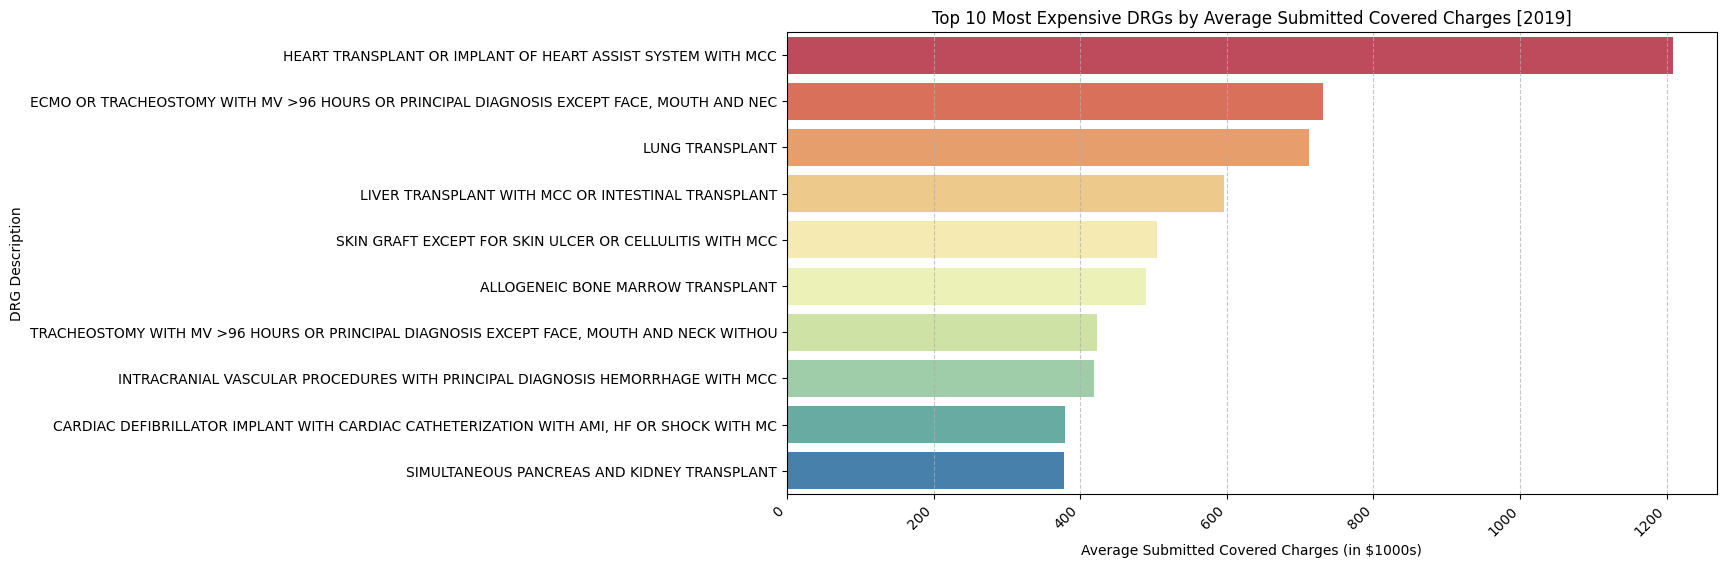

DRG_Desc
HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM WITH MCC                                 1.208186e+06
ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NEC    7.310803e+05
LUNG TRANSPLANT                                                                             7.124053e+05
LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSPLANT                                          5.967444e+05
SKIN GRAFT EXCEPT FOR SKIN ULCER OR CELLULITIS WITH MCC                                     5.051426e+05
Name: Avg_Submtd_Cvrd_Chrg, dtype: float64

In [22]:
# Selecting the top 10 most expensive DRGs based on Average Submitted Covered Charges
top_expensive_drgs = prov_data_19.groupby('DRG_Desc')['Avg_Submtd_Cvrd_Chrg'].mean().nlargest(10)

# Creating a bar chart for the top 10 most expensive DRGs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_expensive_drgs.values / 1000, y=top_expensive_drgs.index, palette='Spectral')  # Converting to $1000s for easier reading
plt.title('Top 10 Most Expensive DRGs by Average Submitted Covered Charges [2019]')
plt.xlabel('Average Submitted Covered Charges (in $1000s)')
plt.ylabel('DRG Description')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Output the top expensive DRGs for review
top_expensive_drgs.head()

In [ ]:
# Identify top HCPCS codes by total payment amount in 2021
top_hcpcs_21 = geo_data_21.groupby('HCPCS_Cd')['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Display the top HCPCS codes
print(top_hcpcs_21)


     HCPCS_Cd  Avg_Mdcr_Pymt_Amt
8971    Q2043       1.220143e+06
3084    37227       4.741232e+05
3086    37229       3.711928e+05
3082    37225       3.166991e+05
3088    37231       2.850505e+05
4885    63685       2.463323e+05
3083    37226       2.441094e+05
3053    36906       2.373413e+05
1091    22514       2.262950e+05
1090    22513       2.258822e+05


<ipython-input-23-b3582c2bd64a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='HCPCS_Desc', data=top_hcpcs_21, palette='viridis')


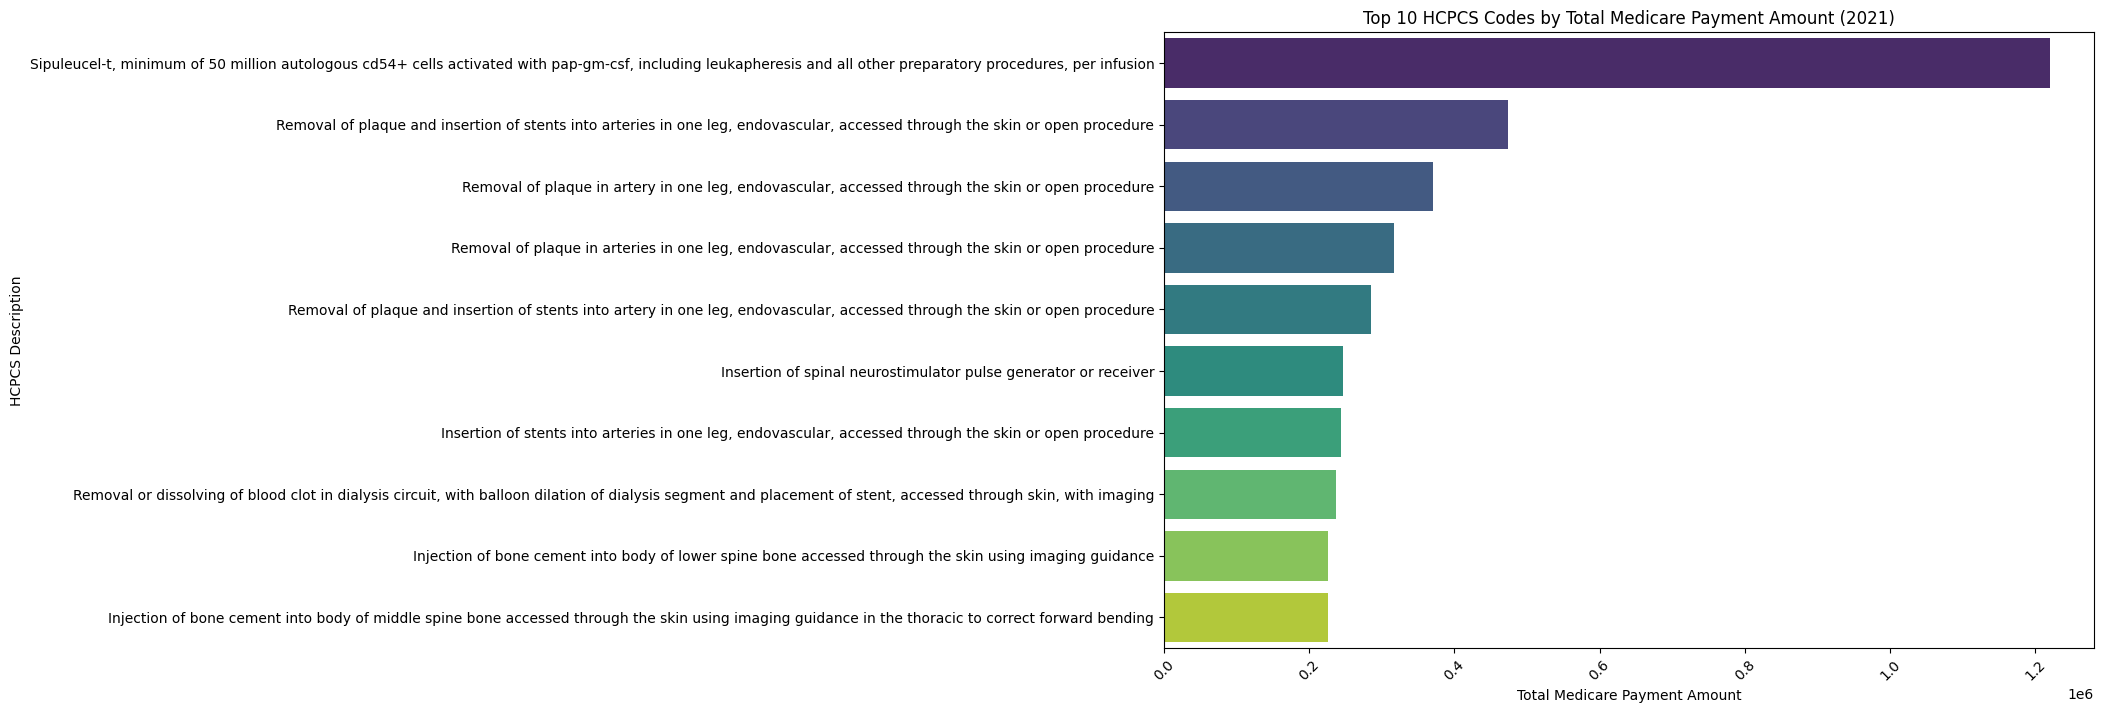

HCPCS_Cd                                         HCPCS_Desc  \
8971    Q2043  Sipuleucel-t, minimum of 50 million autologous...   
3084    37227  Removal of plaque and insertion of stents into...   
3086    37229  Removal of plaque in artery in one leg, endova...   
3082    37225  Removal of plaque in arteries in one leg, endo...   
3088    37231  Removal of plaque and insertion of stents into...   
4885    63685  Insertion of spinal neurostimulator pulse gene...   
3083    37226  Insertion of stents into arteries in one leg, ...   
3053    36906  Removal or dissolving of blood clot in dialysi...   
1091    22514  Injection of bone cement into body of lower sp...   
1090    22513  Injection of bone cement into body of middle s...   

      Avg_Mdcr_Pymt_Amt  
8971       1.220143e+06  
3084       4.741232e+05  
3086       3.711928e+05  
3082       3.166991e+05  
3088       2.850505e+05  
4885       2.463323e+05  
3083       2.441094e+05  
3053       2.373413e+05  
1091       2.262950e+05  
1090       2.258822e+05

In [ ]:
# Ensure 'HCPCS_Cd' and 'HCPCS_Desc' are in geo_data_21
# Group by HCPCS code and description
top_hcpcs_21 = geo_data_21.groupby(['HCPCS_Cd', 'HCPCS_Desc'])['Avg_Mdcr_Pymt_Amt'].sum().reset_index().sort_values(by='Avg_Mdcr_Pymt_Amt', ascending=False).head(10)

# Plotting the top 10 HCPCS codes by total payment amount
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Mdcr_Pymt_Amt', y='HCPCS_Desc', data=top_hcpcs_21, palette='viridis')
plt.title('Top 10 HCPCS Codes by Total Medicare Payment Amount (2021)')
plt.xlabel('Total Medicare Payment Amount')
plt.ylabel('HCPCS Description')
plt.xticks(rotation=45)
plt.show()

# Display the data used for verification
top_hcpcs_21



In [ ]:
# Create a dummy specialty column if not present
if 'Specialty' not in prov_data_21.columns:
    prov_data_21['Specialty'] = prov_data_21['Rndrng_Prvdr_Type']

# Analyze costs by specialties
specialty_costs = prov_data_21.groupby('Specialty')['Tot_Mdcr_Pymt_Amt'].mean().reset_index().sort_values(by='Tot_Mdcr_Pymt_Amt', ascending=False).head(10)

# Display the top specialties
print(specialty_costs)


                            Specialty  Tot_Mdcr_Pymt_Amt
19                Clinical Laboratory       2.066138e+06
89           Radiation Therapy Center       1.184954e+06
3                 All Other Suppliers       8.729325e+05
6          Ambulatory Surgical Center       8.644381e+05
36                Hematology-Oncology       7.393741e+05
82            Portable X-Ray Supplier       6.535394e+05
56  Micrographic Dermatologic Surgery       5.914390e+05
53                   Medical Oncology       5.465376e+05
91                       Rheumatology       5.159380e+05
5          Ambulance Service Provider       4.513252e+05


<ipython-input-14-145a63c3afa8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tot_Mdcr_Pymt_Amt', y='Specialty', data=specialty_costs, palette='magma')


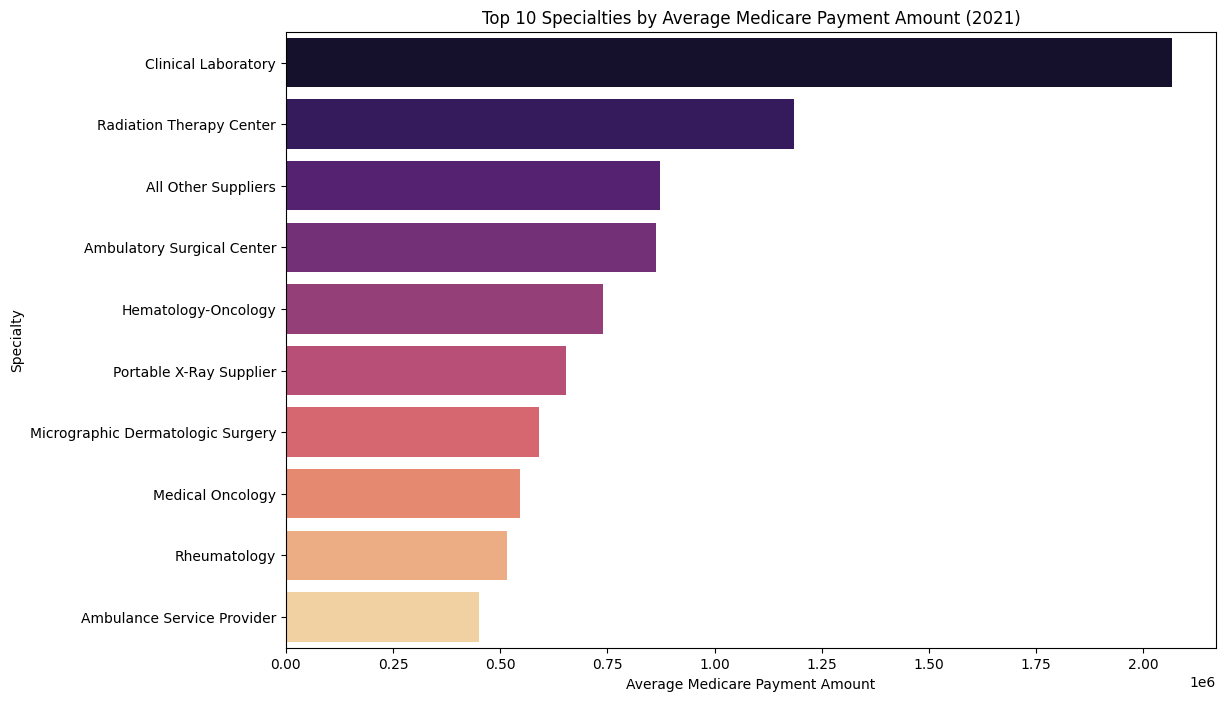

In [ ]:
# Create a dummy specialty column if not present
if 'Specialty' not in prov_data_21.columns:
    prov_data_21['Specialty'] = prov_data_21['Rndrng_Prvdr_Type']

# Analyze costs by specialties
specialty_costs = prov_data_21.groupby('Specialty')['Tot_Mdcr_Pymt_Amt'].mean().reset_index().sort_values(by='Tot_Mdcr_Pymt_Amt', ascending=False).head(10)

# Plotting the top 10 specialties by average Medicare payment amount
plt.figure(figsize=(12, 8))
sns.barplot(x='Tot_Mdcr_Pymt_Amt', y='Specialty', data=specialty_costs, palette='magma')
plt.title('Top 10 Specialties by Average Medicare Payment Amount (2021)')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Specialty')
plt.show()


In [ ]:
import scipy.stats as stats

# Statistical analysis on average Medicare payment amounts by DRG
drg_payment_stats = geo_data_20.groupby('DRG_Cd')['Avg_Mdcr_Pymt_Amt'].agg(['mean', 'std', 'count'])
drg_payment_stats['sem'] = drg_payment_stats['std'] / drg_payment_stats['count'] ** 0.5

# Identify DRGs with significantly higher or lower payments
mean_payment = drg_payment_stats['mean'].mean()
std_payment = drg_payment_stats['mean'].std()

high_payment_drgs = drg_payment_stats[drg_payment_stats['mean'] > mean_payment + std_payment]
low_payment_drgs = drg_payment_stats[drg_payment_stats['mean'] < mean_payment - std_payment]

print("DRGs with significantly higher average Medicare payments:")
print(high_payment_drgs)

print("\nDRGs with significantly lower average Medicare payments:")
print(low_payment_drgs)

# Statistical analysis on average Medicare payment amounts by HCPCS
hcpcs_payment_stats = geo_data_21.groupby('HCPCS_Cd')['Avg_Mdcr_Pymt_Amt'].agg(['mean', 'std', 'count'])
hcpcs_payment_stats['sem'] = hcpcs_payment_stats['std'] / hcpcs_payment_stats['count'] ** 0.5

# Identify HCPCS codes with significantly higher or lower payments
mean_payment_hcpcs = hcpcs_payment_stats['mean'].mean()
std_payment_hcpcs = hcpcs_payment_stats['mean'].std()

high_payment_hcpcs = hcpcs_payment_stats[hcpcs_payment_stats['mean'] > mean_payment_hcpcs + std_payment_hcpcs]
low_payment_hcpcs = hcpcs_payment_stats[hcpcs_payment_stats['mean'] < mean_payment_hcpcs - std_payment_hcpcs]

print("HCPCS codes with significantly higher average Medicare payments:")
print(high_payment_hcpcs)

print("\nHCPCS codes with significantly lower average Medicare payments:")
print(low_payment_hcpcs)


DRGs with significantly higher average Medicare payments:
                 mean           std  count           sem
DRG_Cd                                                  
1       246952.953553  43699.981268     34   7494.484958
2       128619.037550  12336.660376      3   7122.574189
3       153549.090803  32386.625593     50   4580.160515
4        94640.634656  22369.444152     50   3163.517130
5        98948.166661  36062.781474     30   6584.132967
6        48253.221298  26357.158001     16   6589.289500
7       116528.766754  30271.974447     18   7135.172804
8        53216.999893  34528.798609     13   9576.565682
11       43024.407158  11892.600040     38   1929.234479
14      115693.813967  22829.236998     31   4100.252006
16       89701.911971  43554.130003     38   7065.412865
18      312548.563572  88520.552127      6  36138.364077
19       61080.869565           NaN      1           NaN
20       83575.505406  11366.155196     37   1868.584404
21       60247.607992   9136.2

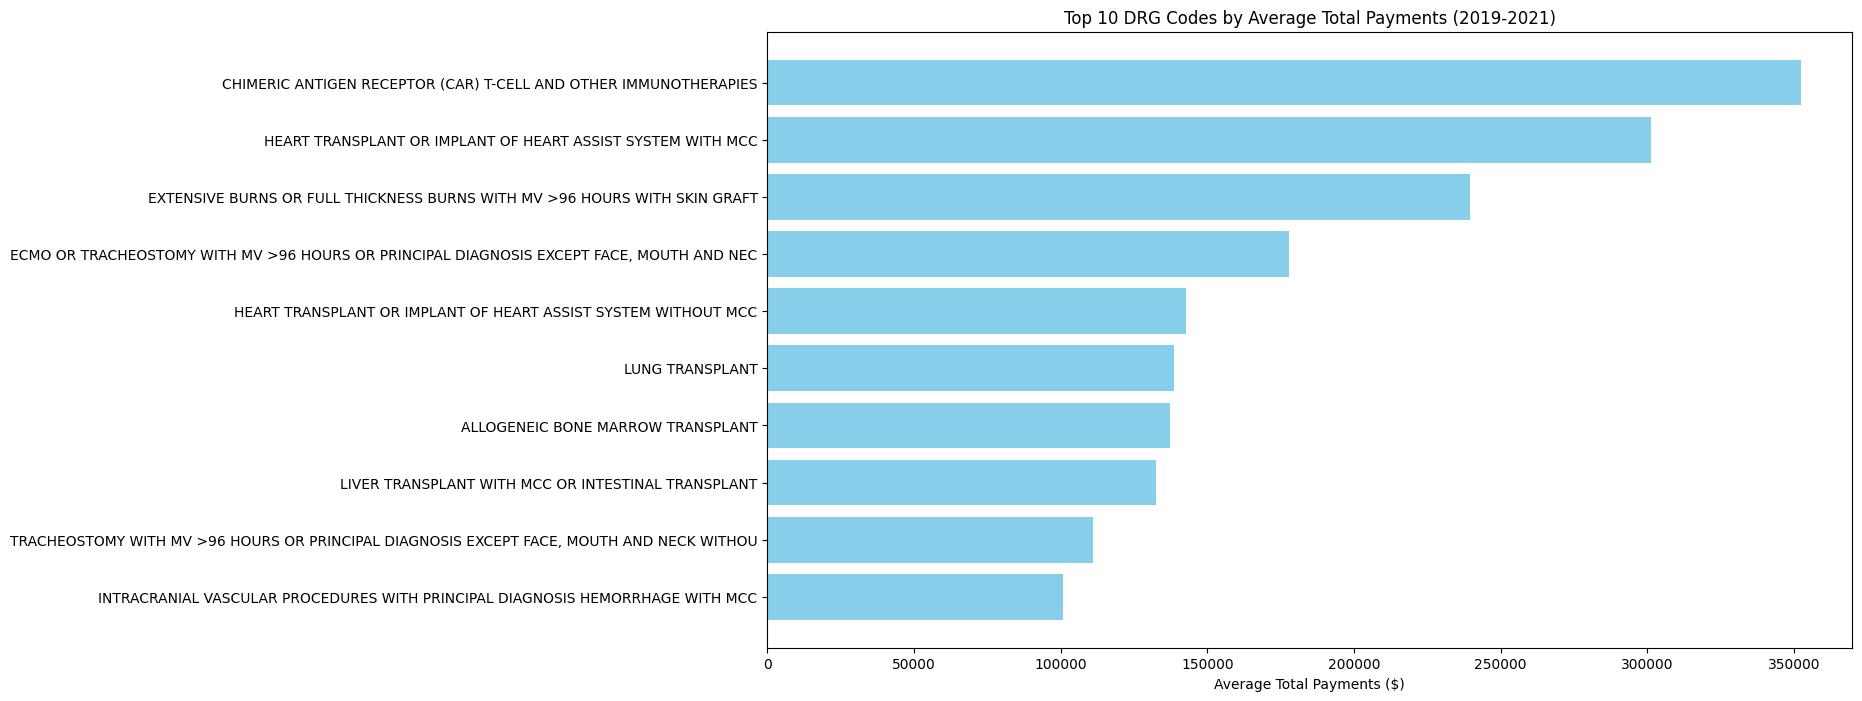

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define key columns for analysis
key_columns = ['DRG_Cd', 'DRG_Desc', 'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']

# Select key columns from each dataset
geo_data_21_selected = geo_data_21[key_columns]
prov_data_21_selected = prov_data_21[key_columns]
geo_data_19_selected = geo_data_19[key_columns]
prov_data_19_selected = prov_data_19[key_columns]
geo_data_20_selected = geo_data_20[key_columns]
prov_data_20_selected = prov_data_20[key_columns]

# Combine datasets for a comprehensive analysis
combined_data = pd.concat([
    geo_data_21_selected.assign(year=2021),
    prov_data_21_selected.assign(year=2021),
    geo_data_19_selected.assign(year=2019),
    prov_data_19_selected.assign(year=2019),
    geo_data_20_selected.assign(year=2020),
    prov_data_20_selected.assign(year=2020)
])

# Calculate the average charges and payments for each DRG code across all years
avg_charges_payments = combined_data.groupby('DRG_Cd').agg({
    'Avg_Submtd_Cvrd_Chrg': 'mean',
    'Avg_Tot_Pymt_Amt': 'mean',
    'Avg_Mdcr_Pymt_Amt': 'mean'
}).reset_index()

# Merge with DRG descriptions
drg_descriptions = combined_data[['DRG_Cd', 'DRG_Desc']].drop_duplicates()
avg_charges_payments = avg_charges_payments.merge(drg_descriptions, on='DRG_Cd')

# Sort by average total payments
avg_charges_payments = avg_charges_payments.sort_values(by='Avg_Tot_Pymt_Amt', ascending=False)

# Display the top 10 DRG codes with the highest average total payments
top_10_drg = avg_charges_payments.head(10)

# Plot the top 10 DRG codes with the highest average total payments
plt.figure(figsize=(14, 8))
plt.barh(top_10_drg['DRG_Desc'], top_10_drg['Avg_Tot_Pymt_Amt'], color='skyblue')
plt.xlabel('Average Total Payments ($)')
plt.title('Top 10 DRG Codes by Average Total Payments (2019-2021)')
plt.gca().invert_yaxis()
plt.show()

In [8]:
from scipy.stats import f_oneway


In [17]:
# Combine data from all years for analysis
all_geo_data = pd.concat([geo_data_21.assign(year=2021), geo_data_20.assign(year=2020), geo_data_19.assign(year=2019)])

# Group by DRG and calculate average and total costs
drg_costs = all_geo_data.groupby('DRG_Desc').agg({
    'Avg_Submtd_Cvrd_Chrg': 'mean',
    'Avg_Tot_Pymt_Amt': 'mean',
    'Avg_Mdcr_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

# Calculate total costs
drg_costs['total_submtd_cvrd_chrg'] = drg_costs['Avg_Submtd_Cvrd_Chrg'] * drg_costs['Tot_Dschrgs']
drg_costs['total_tot_pymt_amt'] = drg_costs['Avg_Tot_Pymt_Amt'] * drg_costs['Tot_Dschrgs']
drg_costs['total_mdcr_pymt_amt'] = drg_costs['Avg_Mdcr_Pymt_Amt'] * drg_costs['Tot_Dschrgs']

# Sort by total costs
drg_costs_sorted = drg_costs.sort_values(by='total_tot_pymt_amt', ascending=False)

top_10_drg_costs = drg_costs_sorted.head(10)
print(top_10_drg_costs)


                                              DRG_Desc  Avg_Submtd_Cvrd_Chrg  \
627  SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...          62059.722212   
606  RESPIRATORY INFECTIONS AND INFLAMMATIONS WITH MCC          55672.786623   
364  MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...          62611.094198   
245                   HEART FAILURE AND SHOCK WITH MCC          42441.152538   
276  INFECTIOUS AND PARASITIC DISEASES WITH O.R. PR...         159926.011494   
200  ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...         663960.211497   
626      SEPTICEMIA OR SEVERE SEPSIS WITH MV >96 HOURS         230378.577993   
613  RESPIRATORY SYSTEM DIAGNOSIS WITH VENTILATOR S...         221797.794555   
688  TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...         425809.162133   
205  ENDOVASCULAR CARDIAC VALVE REPLACEMENT AND SUP...         172823.442029   

     Avg_Tot_Pymt_Amt  Avg_Mdcr_Pymt_Amt  Tot_Dschrgs  total_submtd_cvrd_chrg  \
627      15573.845511       13384.6353

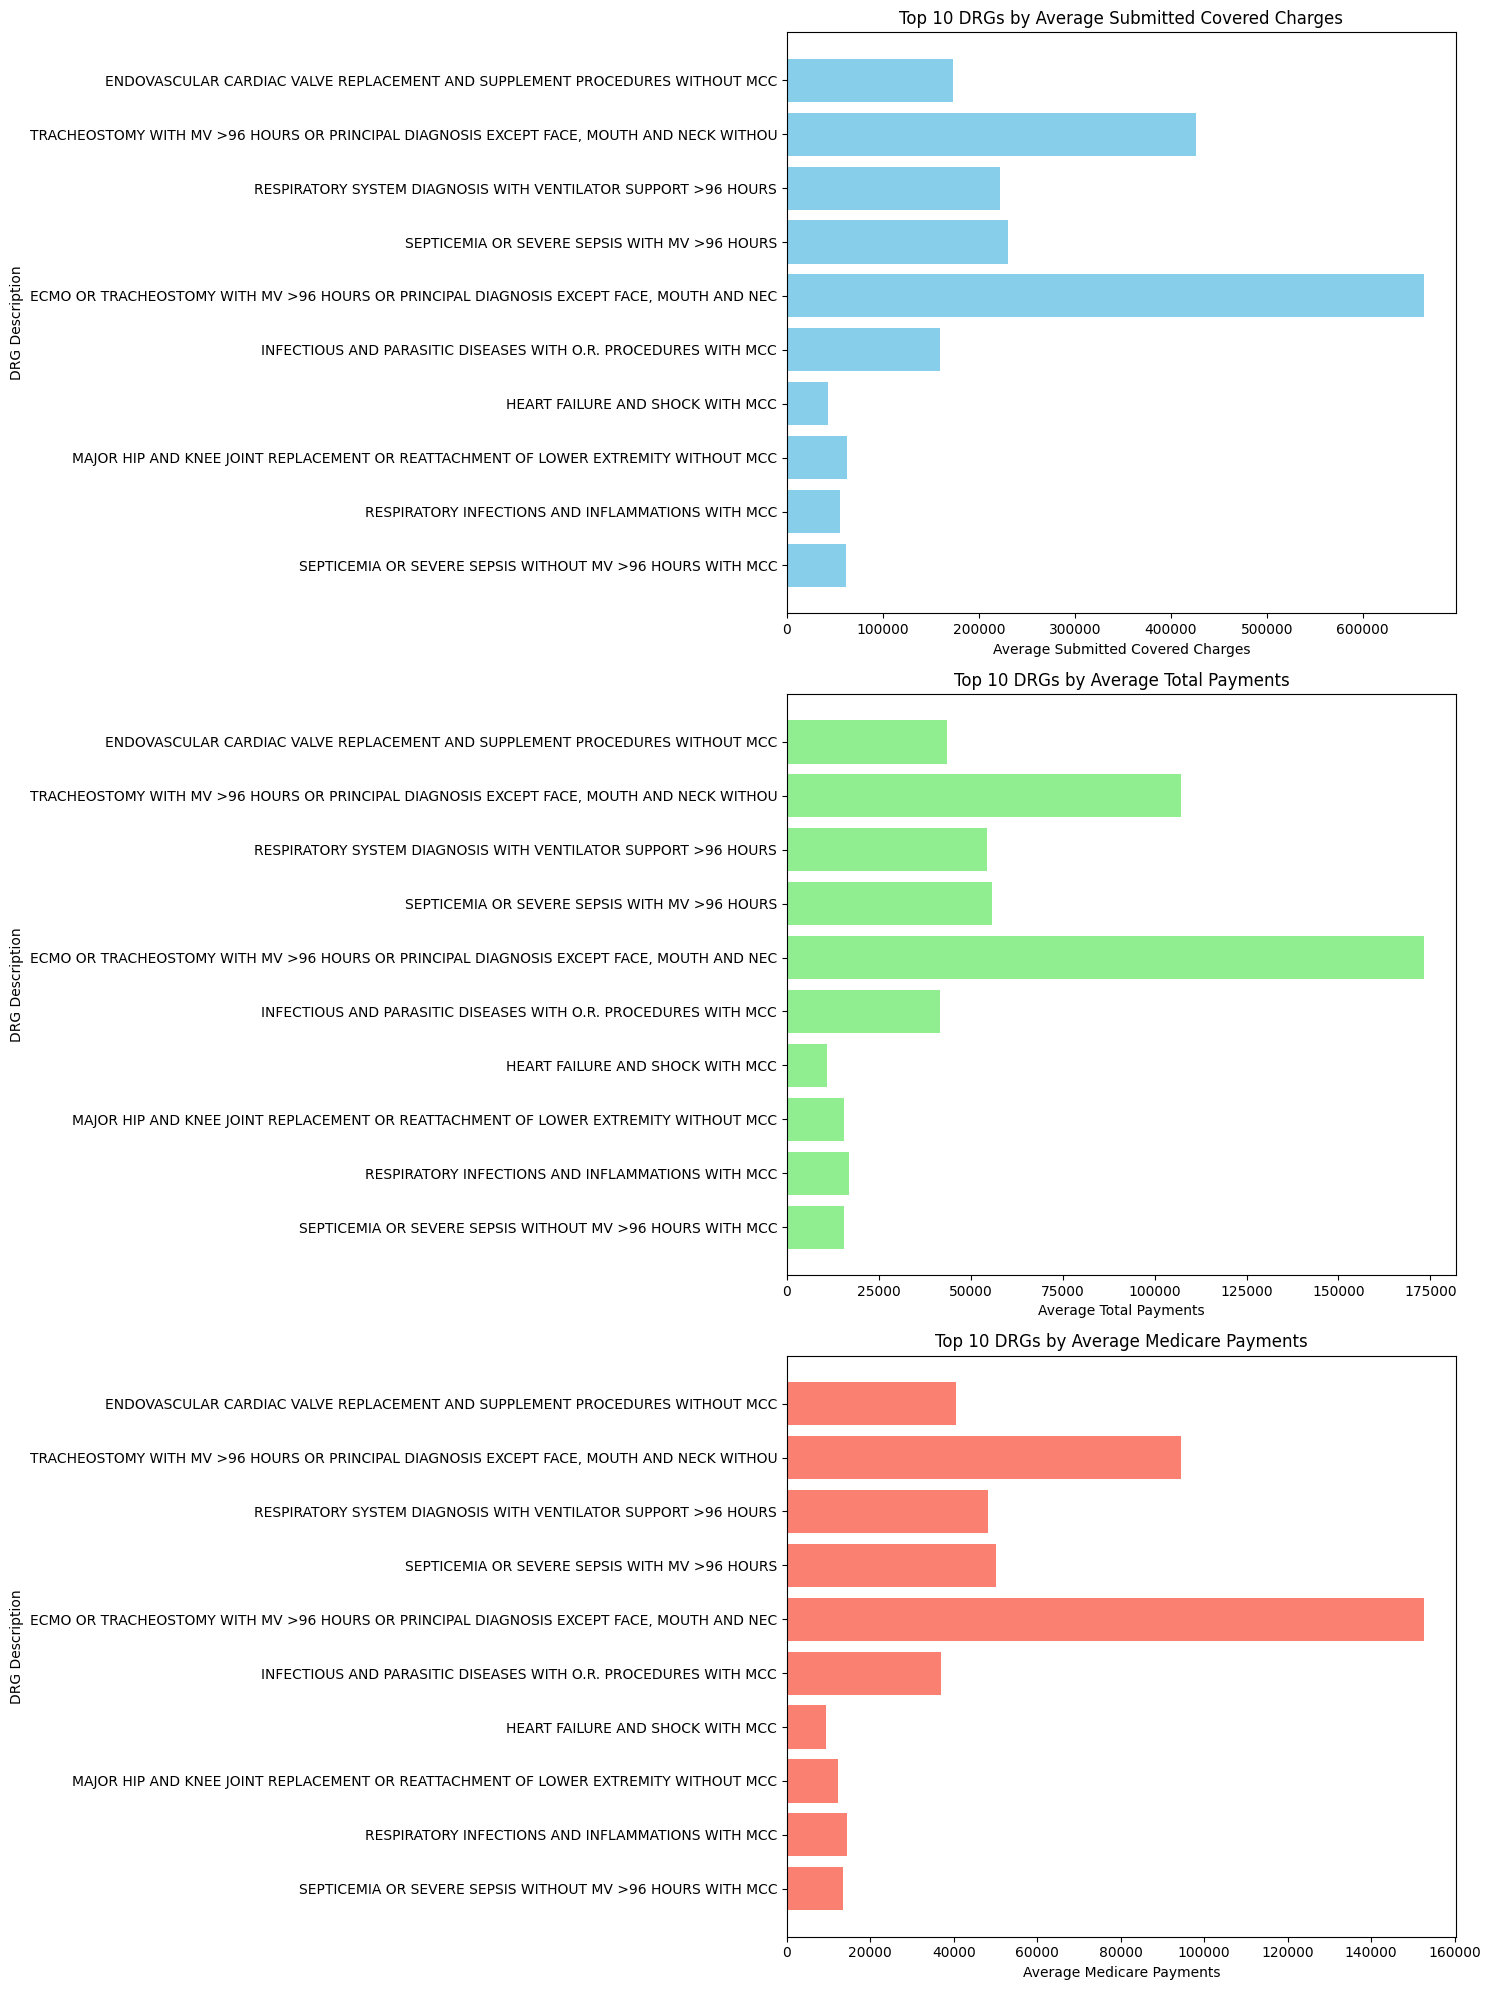

In [18]:
import matplotlib.pyplot as plt

# Define a function to visualize the top 10 most expensive DRGs
def visualize_top_drg_costs(drg_costs):
    # Set up the figure and axes
    fig, ax = plt.subplots(3, 1, figsize=(15, 20))

    # Plot Average Submitted Covered Charges
    ax[0].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Submtd_Cvrd_Chrg'], color='skyblue')
    ax[0].set_title('Top 10 DRGs by Average Submitted Covered Charges')
    ax[0].set_xlabel('Average Submitted Covered Charges')
    ax[0].set_ylabel('DRG Description')

    # Plot Average Total Payments
    ax[1].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Tot_Pymt_Amt'], color='lightgreen')
    ax[1].set_title('Top 10 DRGs by Average Total Payments')
    ax[1].set_xlabel('Average Total Payments')
    ax[1].set_ylabel('DRG Description')

    # Plot Average Medicare Payments
    ax[2].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Mdcr_Pymt_Amt'], color='salmon')
    ax[2].set_title('Top 10 DRGs by Average Medicare Payments')
    ax[2].set_xlabel('Average Medicare Payments')
    ax[2].set_ylabel('DRG Description')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize the top 10 most expensive DRGs
visualize_top_drg_costs(top_10_drg_costs)


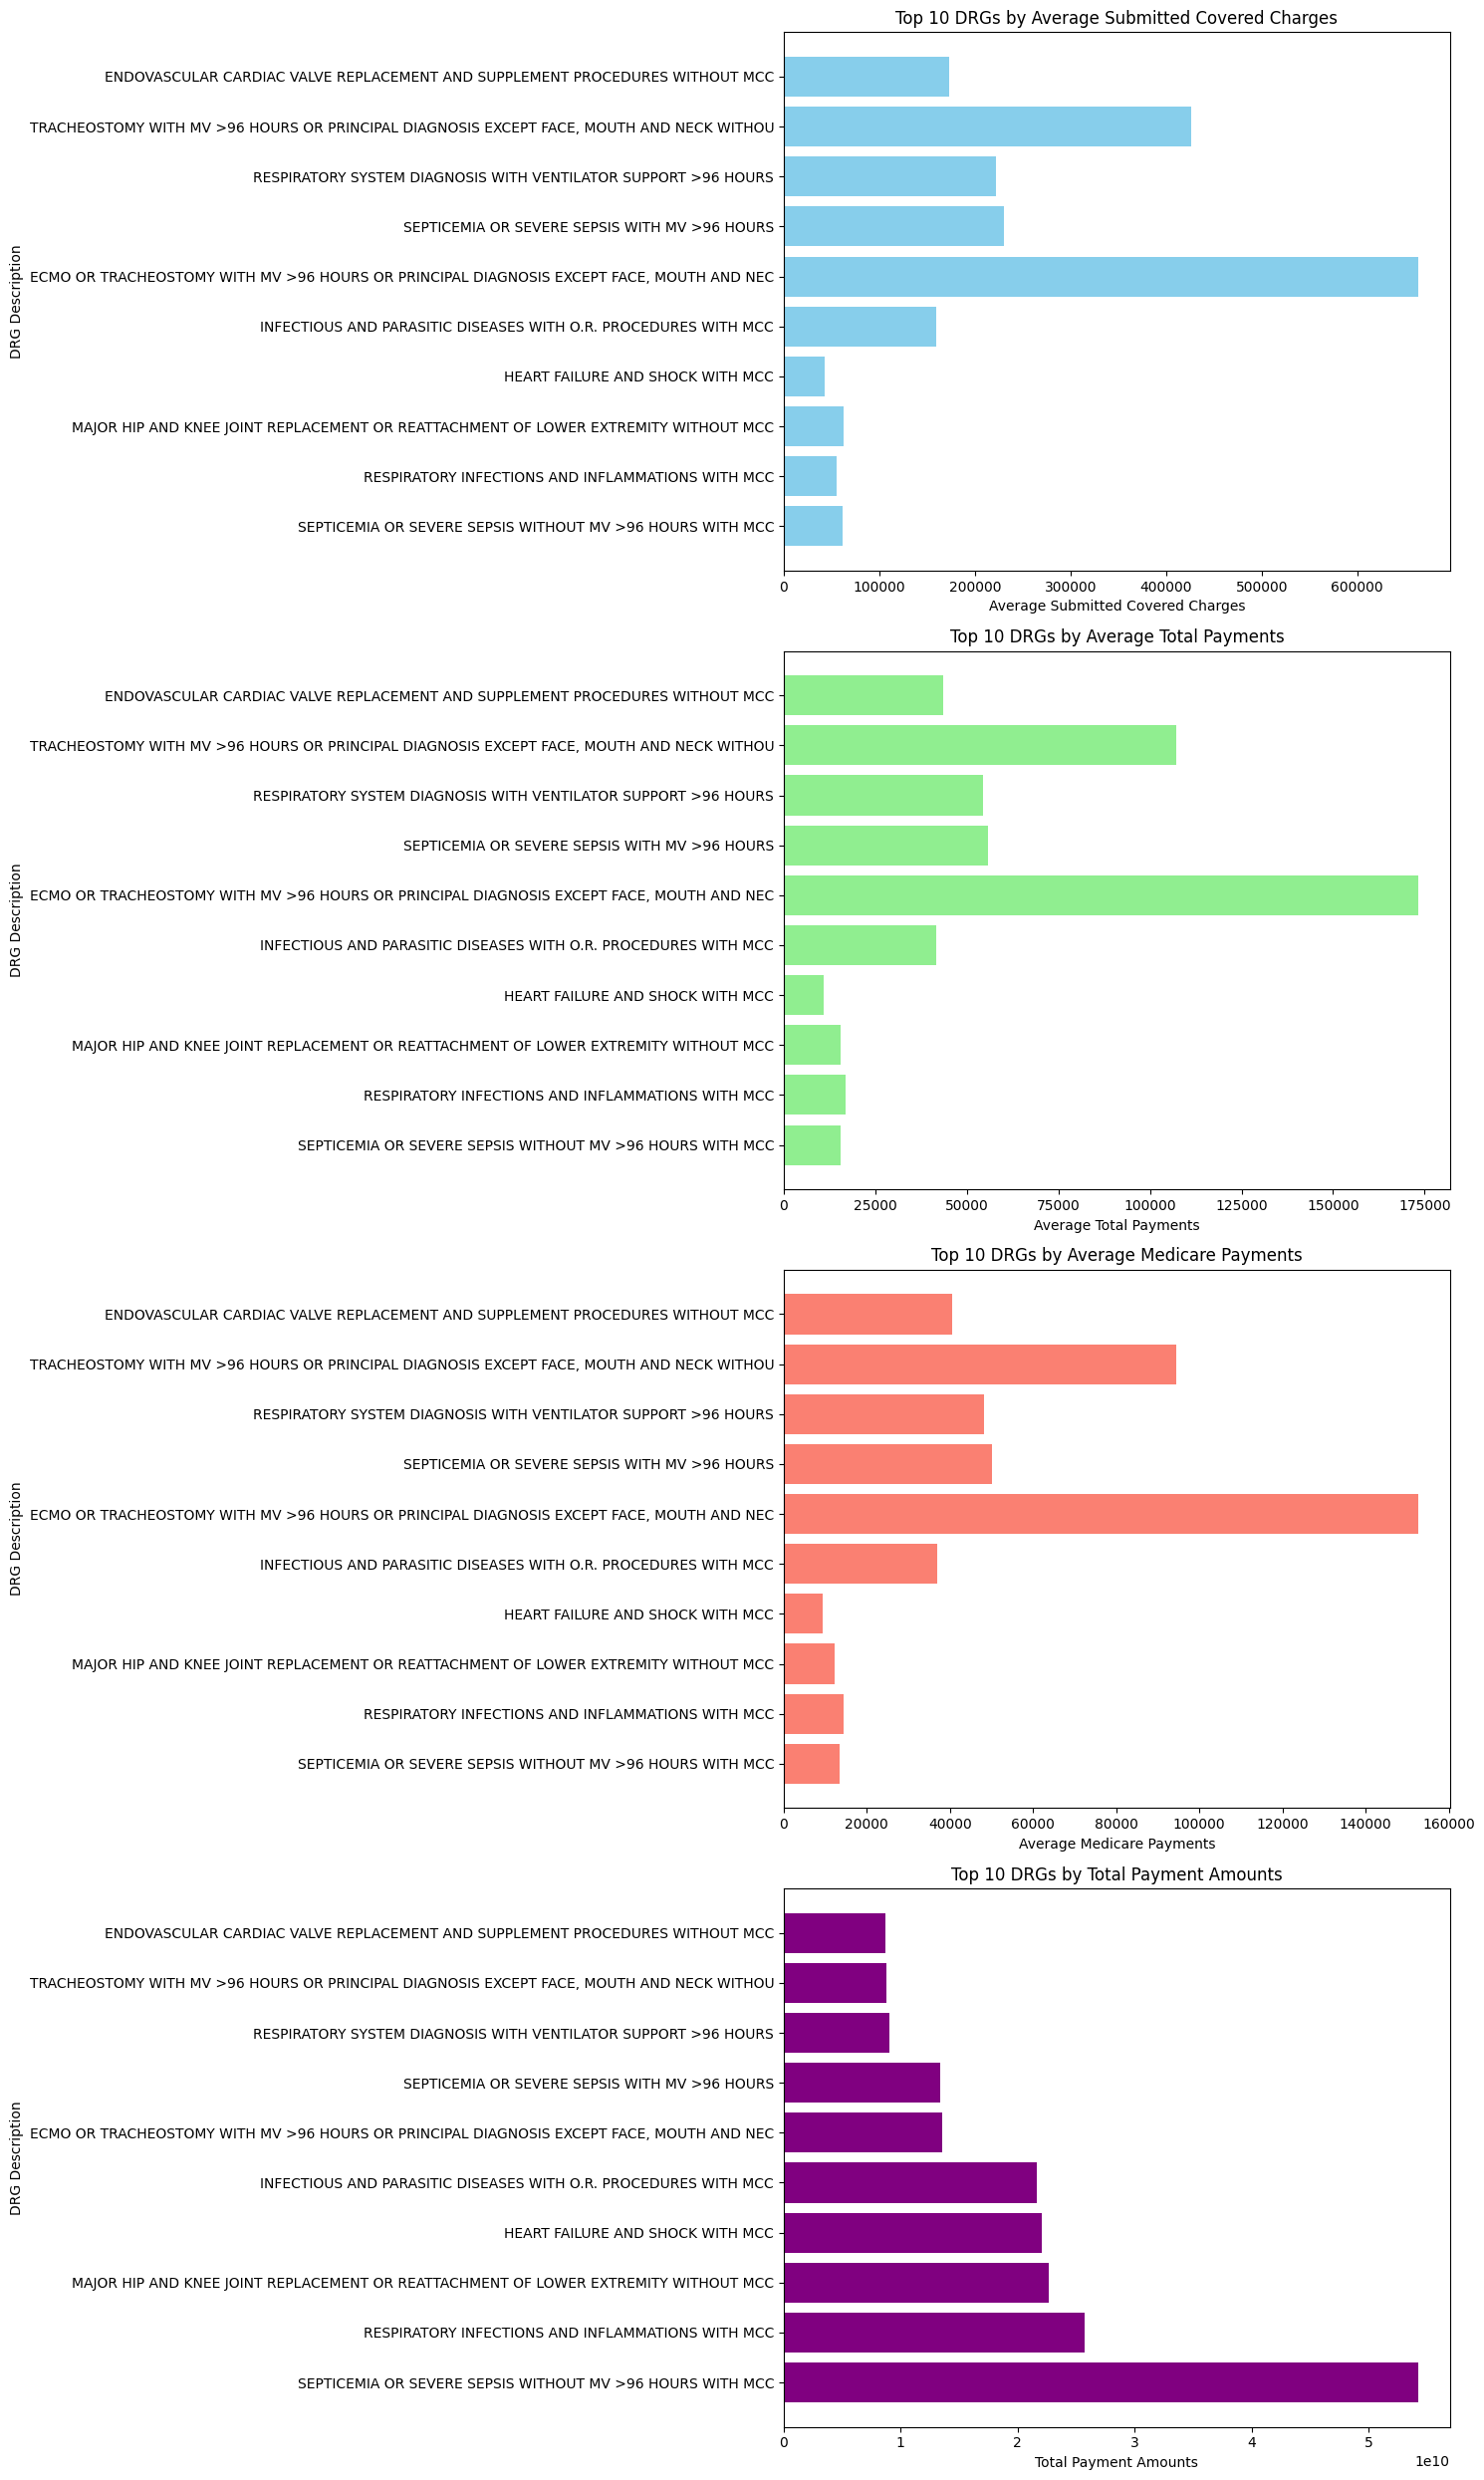

In [20]:
drg_costs = all_geo_data.groupby('DRG_Desc').agg({
    'Avg_Submtd_Cvrd_Chrg': 'mean',
    'Avg_Tot_Pymt_Amt': 'mean',
    'Avg_Mdcr_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

drg_costs['Total_Submtd_Cvrd_Chrg'] = drg_costs['Avg_Submtd_Cvrd_Chrg'] * drg_costs['Tot_Dschrgs']
drg_costs['Total_Tot_Pymt_Amt'] = drg_costs['Avg_Tot_Pymt_Amt'] * drg_costs['Tot_Dschrgs']
drg_costs['Total_Mdcr_Pymt_Amt'] = drg_costs['Avg_Mdcr_Pymt_Amt'] * drg_costs['Tot_Dschrgs']

drg_costs_sorted = drg_costs.sort_values(by='Total_Tot_Pymt_Amt', ascending=False)
top_10_drg_costs = drg_costs_sorted.head(10)

# Define a function to visualize the top 10 most expensive DRGs including total payment amounts
def visualize_top_drg_costs_with_totals(drg_costs):
    # Set up the figure and axes
    fig, ax = plt.subplots(4, 1, figsize=(15, 25))

    # Plot Average Submitted Covered Charges
    ax[0].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Submtd_Cvrd_Chrg'], color='skyblue')
    ax[0].set_title('Top 10 DRGs by Average Submitted Covered Charges')
    ax[0].set_xlabel('Average Submitted Covered Charges')
    ax[0].set_ylabel('DRG Description')

    # Plot Average Total Payments
    ax[1].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Tot_Pymt_Amt'], color='lightgreen')
    ax[1].set_title('Top 10 DRGs by Average Total Payments')
    ax[1].set_xlabel('Average Total Payments')
    ax[1].set_ylabel('DRG Description')

    # Plot Average Medicare Payments
    ax[2].barh(drg_costs['DRG_Desc'], drg_costs['Avg_Mdcr_Pymt_Amt'], color='salmon')
    ax[2].set_title('Top 10 DRGs by Average Medicare Payments')
    ax[2].set_xlabel('Average Medicare Payments')
    ax[2].set_ylabel('DRG Description')

    # Plot Total Payment Amounts
    ax[3].barh(drg_costs['DRG_Desc'], drg_costs['Total_Tot_Pymt_Amt'], color='purple')
    ax[3].set_title('Top 10 DRGs by Total Payment Amounts')
    ax[3].set_xlabel('Total Payment Amounts')
    ax[3].set_ylabel('DRG Description')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize the top 10 most expensive DRGs with total payment amounts
visualize_top_drg_costs_with_totals(top_10_drg_costs)


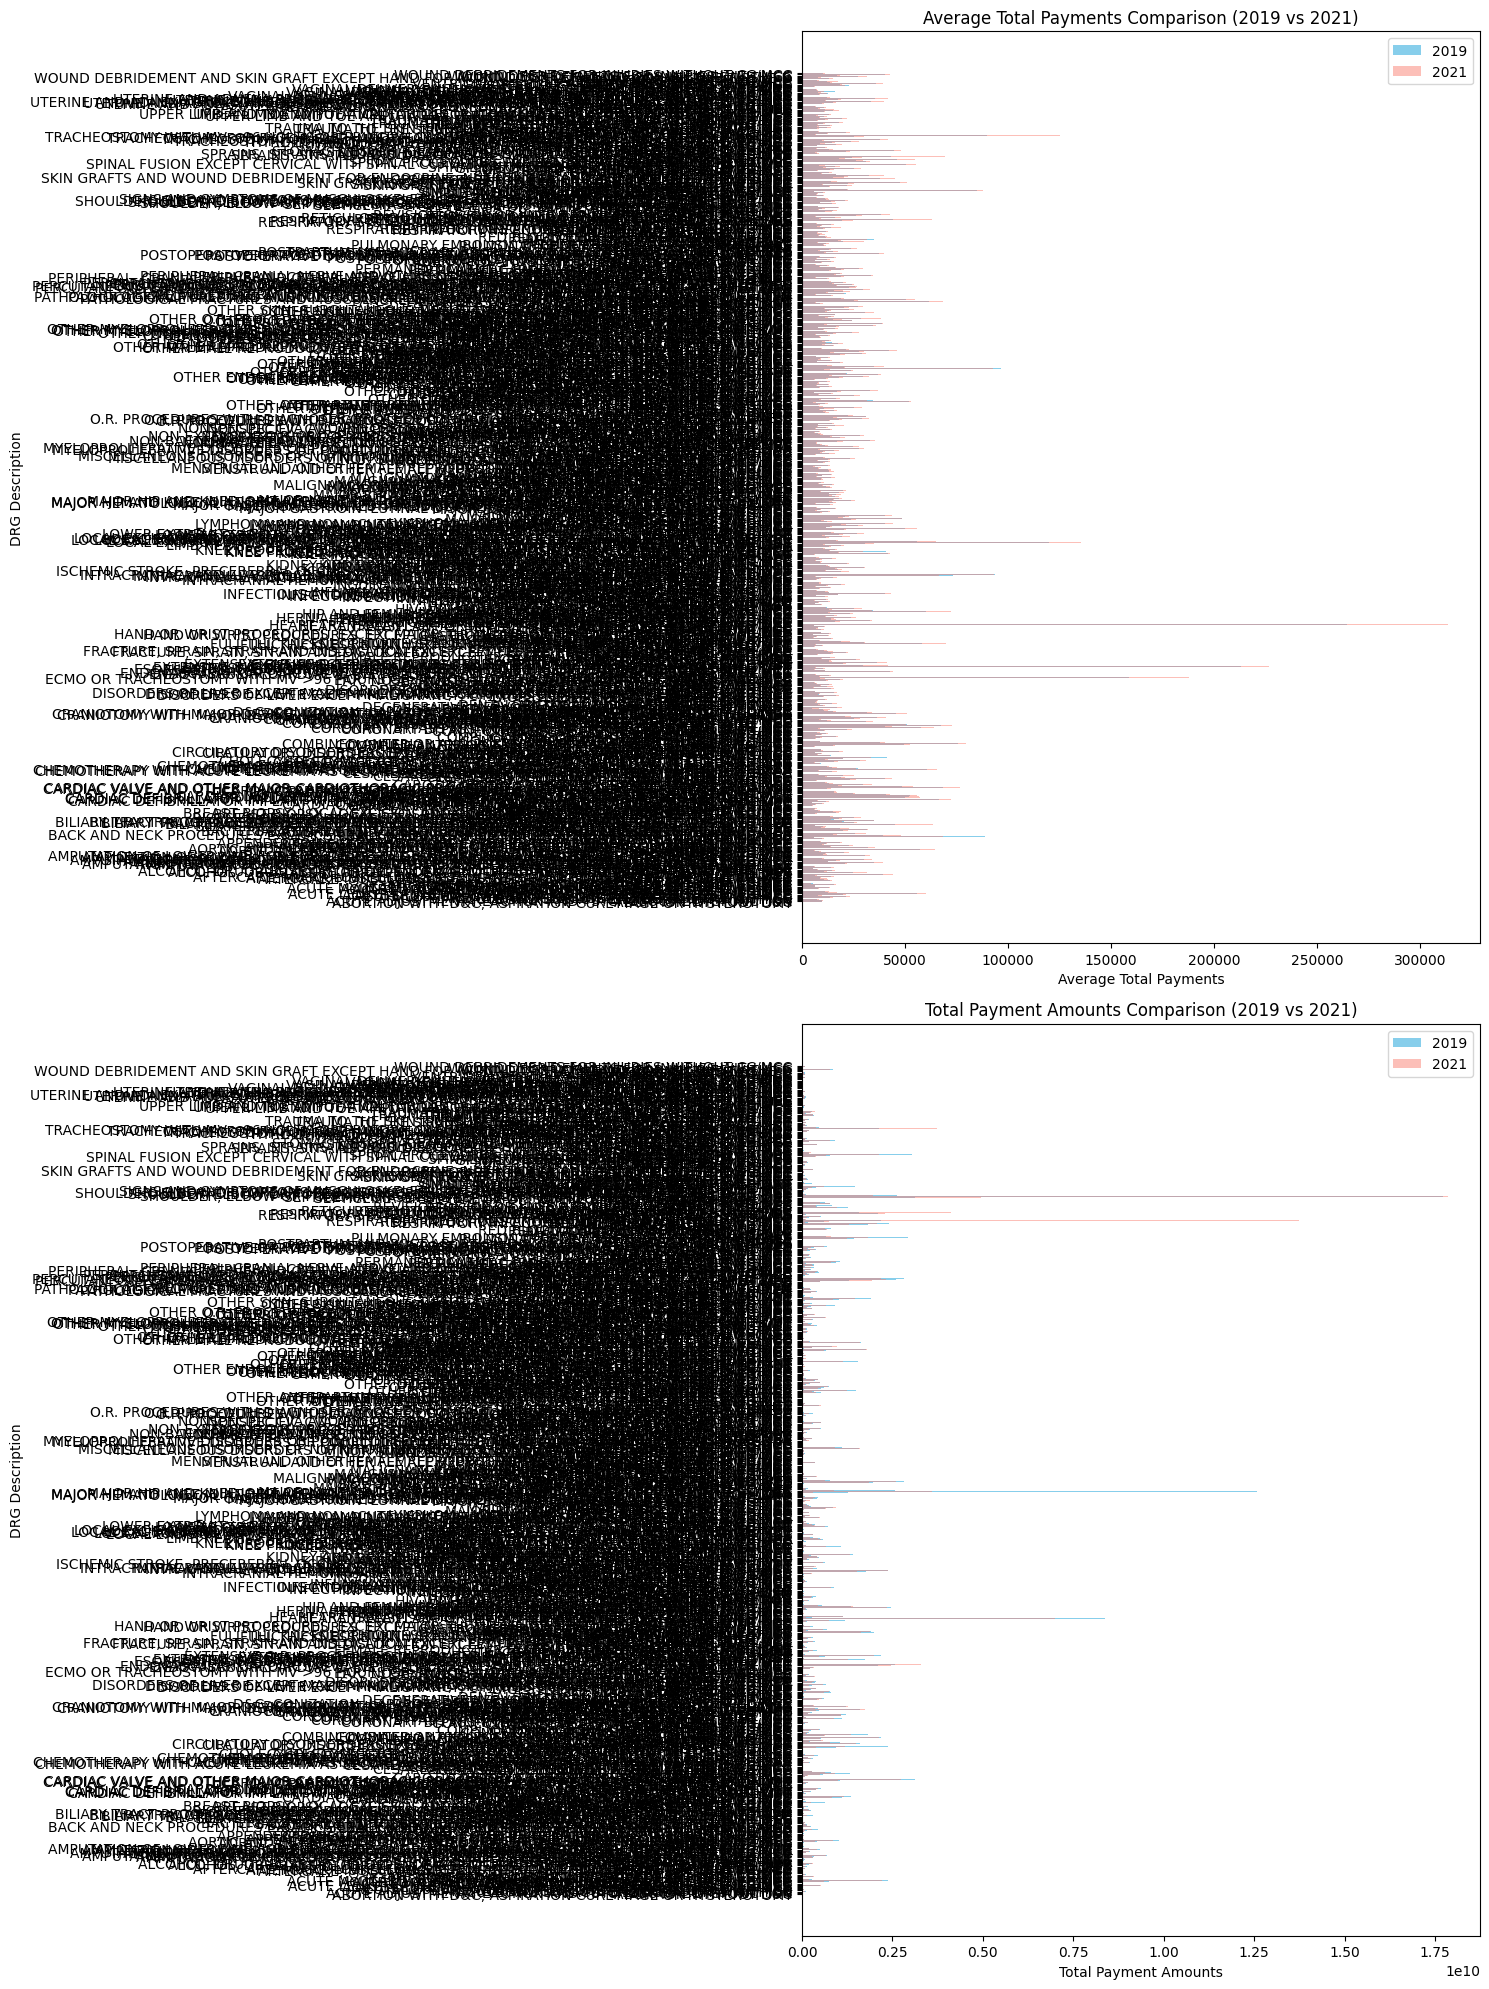

In [23]:
# Group by DRG and year, then calculate total and average payment amounts
drg_yearly_costs = all_geo_data.groupby(['DRG_Desc', 'year']).agg({
    'Avg_Tot_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

# Calculate total payment amounts
drg_yearly_costs['Total_Tot_Pymt_Amt'] = drg_yearly_costs['Avg_Tot_Pymt_Amt'] * drg_yearly_costs['Tot_Dschrgs']

# Separate data for the years 2019, 2020, and 2021
drg_2019 = drg_yearly_costs[drg_yearly_costs['year'] == 2019]
drg_2020 = drg_yearly_costs[drg_yearly_costs['year'] == 2020]
drg_2021 = drg_yearly_costs[drg_yearly_costs['year'] == 2021]

# Merge the data to compare 2019 and 2021
drg_compare = pd.merge(drg_2019, drg_2021, on='DRG_Desc', suffixes=('_2019', '_2021'))

# Select relevant columns for comparison
drg_compare = drg_compare[['DRG_Desc', 'Avg_Tot_Pymt_Amt_2019', 'Avg_Tot_Pymt_Amt_2021', 'Total_Tot_Pymt_Amt_2019', 'Total_Tot_Pymt_Amt_2021']]
import matplotlib.pyplot as plt

def visualize_drg_comparison(drg_compare):
    fig, ax = plt.subplots(2, 1, figsize=(15, 20))

    # Plot Average Total Payments
    ax[0].barh(drg_compare['DRG_Desc'], drg_compare['Avg_Tot_Pymt_Amt_2019'], color='skyblue', label='2019')
    ax[0].barh(drg_compare['DRG_Desc'], drg_compare['Avg_Tot_Pymt_Amt_2021'], color='salmon', alpha=0.5, label='2021')
    ax[0].set_title('Average Total Payments Comparison (2019 vs 2021)')
    ax[0].set_xlabel('Average Total Payments')
    ax[0].set_ylabel('DRG Description')
    ax[0].legend()

    # Plot Total Payment Amounts
    ax[1].barh(drg_compare['DRG_Desc'], drg_compare['Total_Tot_Pymt_Amt_2019'], color='skyblue', label='2019')
    ax[1].barh(drg_compare['DRG_Desc'], drg_compare['Total_Tot_Pymt_Amt_2021'], color='salmon', alpha=0.5, label='2021')
    ax[1].set_title('Total Payment Amounts Comparison (2019 vs 2021)')
    ax[1].set_xlabel('Total Payment Amounts')
    ax[1].set_ylabel('DRG Description')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

visualize_drg_comparison(drg_compare)


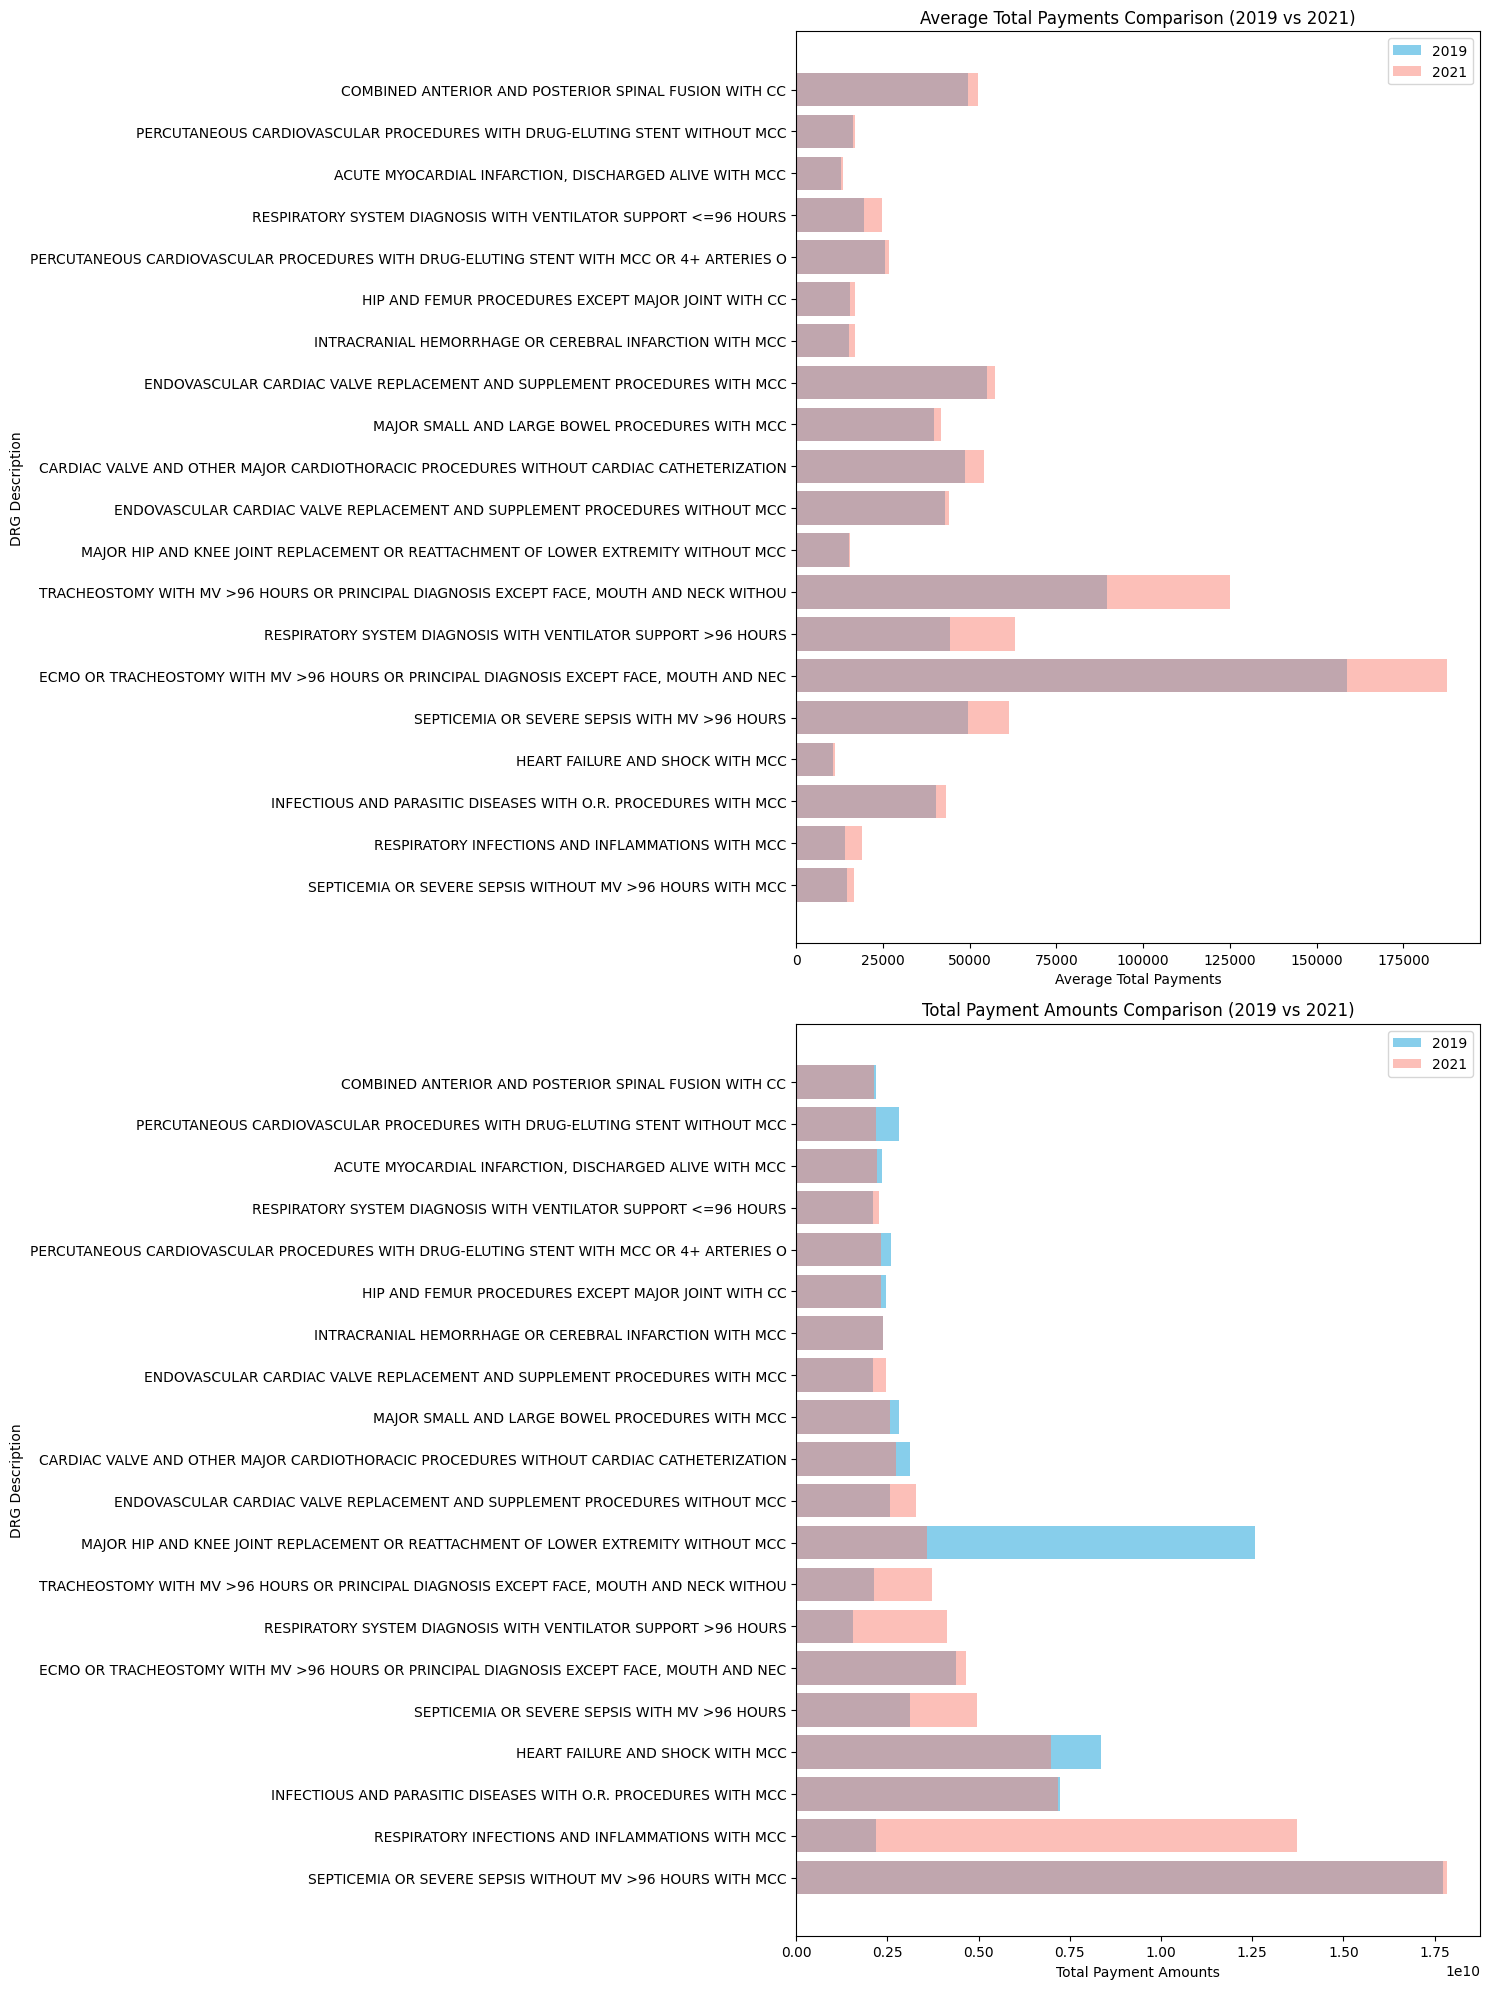

In [24]:
import pandas as pd

# Assuming you have already loaded the data and calculated the required metrics as shown before
drg_yearly_costs = all_geo_data.groupby(['DRG_Desc', 'year']).agg({
    'Avg_Tot_Pymt_Amt': 'mean',
    'Tot_Dschrgs': 'sum'
}).reset_index()

drg_yearly_costs['Total_Tot_Pymt_Amt'] = drg_yearly_costs['Avg_Tot_Pymt_Amt'] * drg_yearly_costs['Tot_Dschrgs']

drg_2019 = drg_yearly_costs[drg_yearly_costs['year'] == 2019]
drg_2020 = drg_yearly_costs[drg_yearly_costs['year'] == 2020]
drg_2021 = drg_yearly_costs[drg_yearly_costs['year'] == 2021]

drg_compare = pd.merge(drg_2019, drg_2021, on='DRG_Desc', suffixes=('_2019', '_2021'))
drg_compare = drg_compare[['DRG_Desc', 'Avg_Tot_Pymt_Amt_2019', 'Avg_Tot_Pymt_Amt_2021', 'Total_Tot_Pymt_Amt_2019', 'Total_Tot_Pymt_Amt_2021']]

# Focus on top 20 DRGs by total payment amounts in 2021
top_20_drg_compare = drg_compare.nlargest(20, 'Total_Tot_Pymt_Amt_2021')

import matplotlib.pyplot as plt

def visualize_top_20_drg_comparison(drg_compare):
    fig, ax = plt.subplots(2, 1, figsize=(15, 20))

    # Plot Average Total Payments
    ax[0].barh(drg_compare['DRG_Desc'], drg_compare['Avg_Tot_Pymt_Amt_2019'], color='skyblue', label='2019')
    ax[0].barh(drg_compare['DRG_Desc'], drg_compare['Avg_Tot_Pymt_Amt_2021'], color='salmon', alpha=0.5, label='2021')
    ax[0].set_title('Average Total Payments Comparison (2019 vs 2021)')
    ax[0].set_xlabel('Average Total Payments')
    ax[0].set_ylabel('DRG Description')
    ax[0].legend()

    # Plot Total Payment Amounts
    ax[1].barh(drg_compare['DRG_Desc'], drg_compare['Total_Tot_Pymt_Amt_2019'], color='skyblue', label='2019')
    ax[1].barh(drg_compare['DRG_Desc'], drg_compare['Total_Tot_Pymt_Amt_2021'], color='salmon', alpha=0.5, label='2021')
    ax[1].set_title('Total Payment Amounts Comparison (2019 vs 2021)')
    ax[1].set_xlabel('Total Payment Amounts')
    ax[1].set_ylabel('DRG Description')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

visualize_top_20_drg_comparison(top_20_drg_compare)



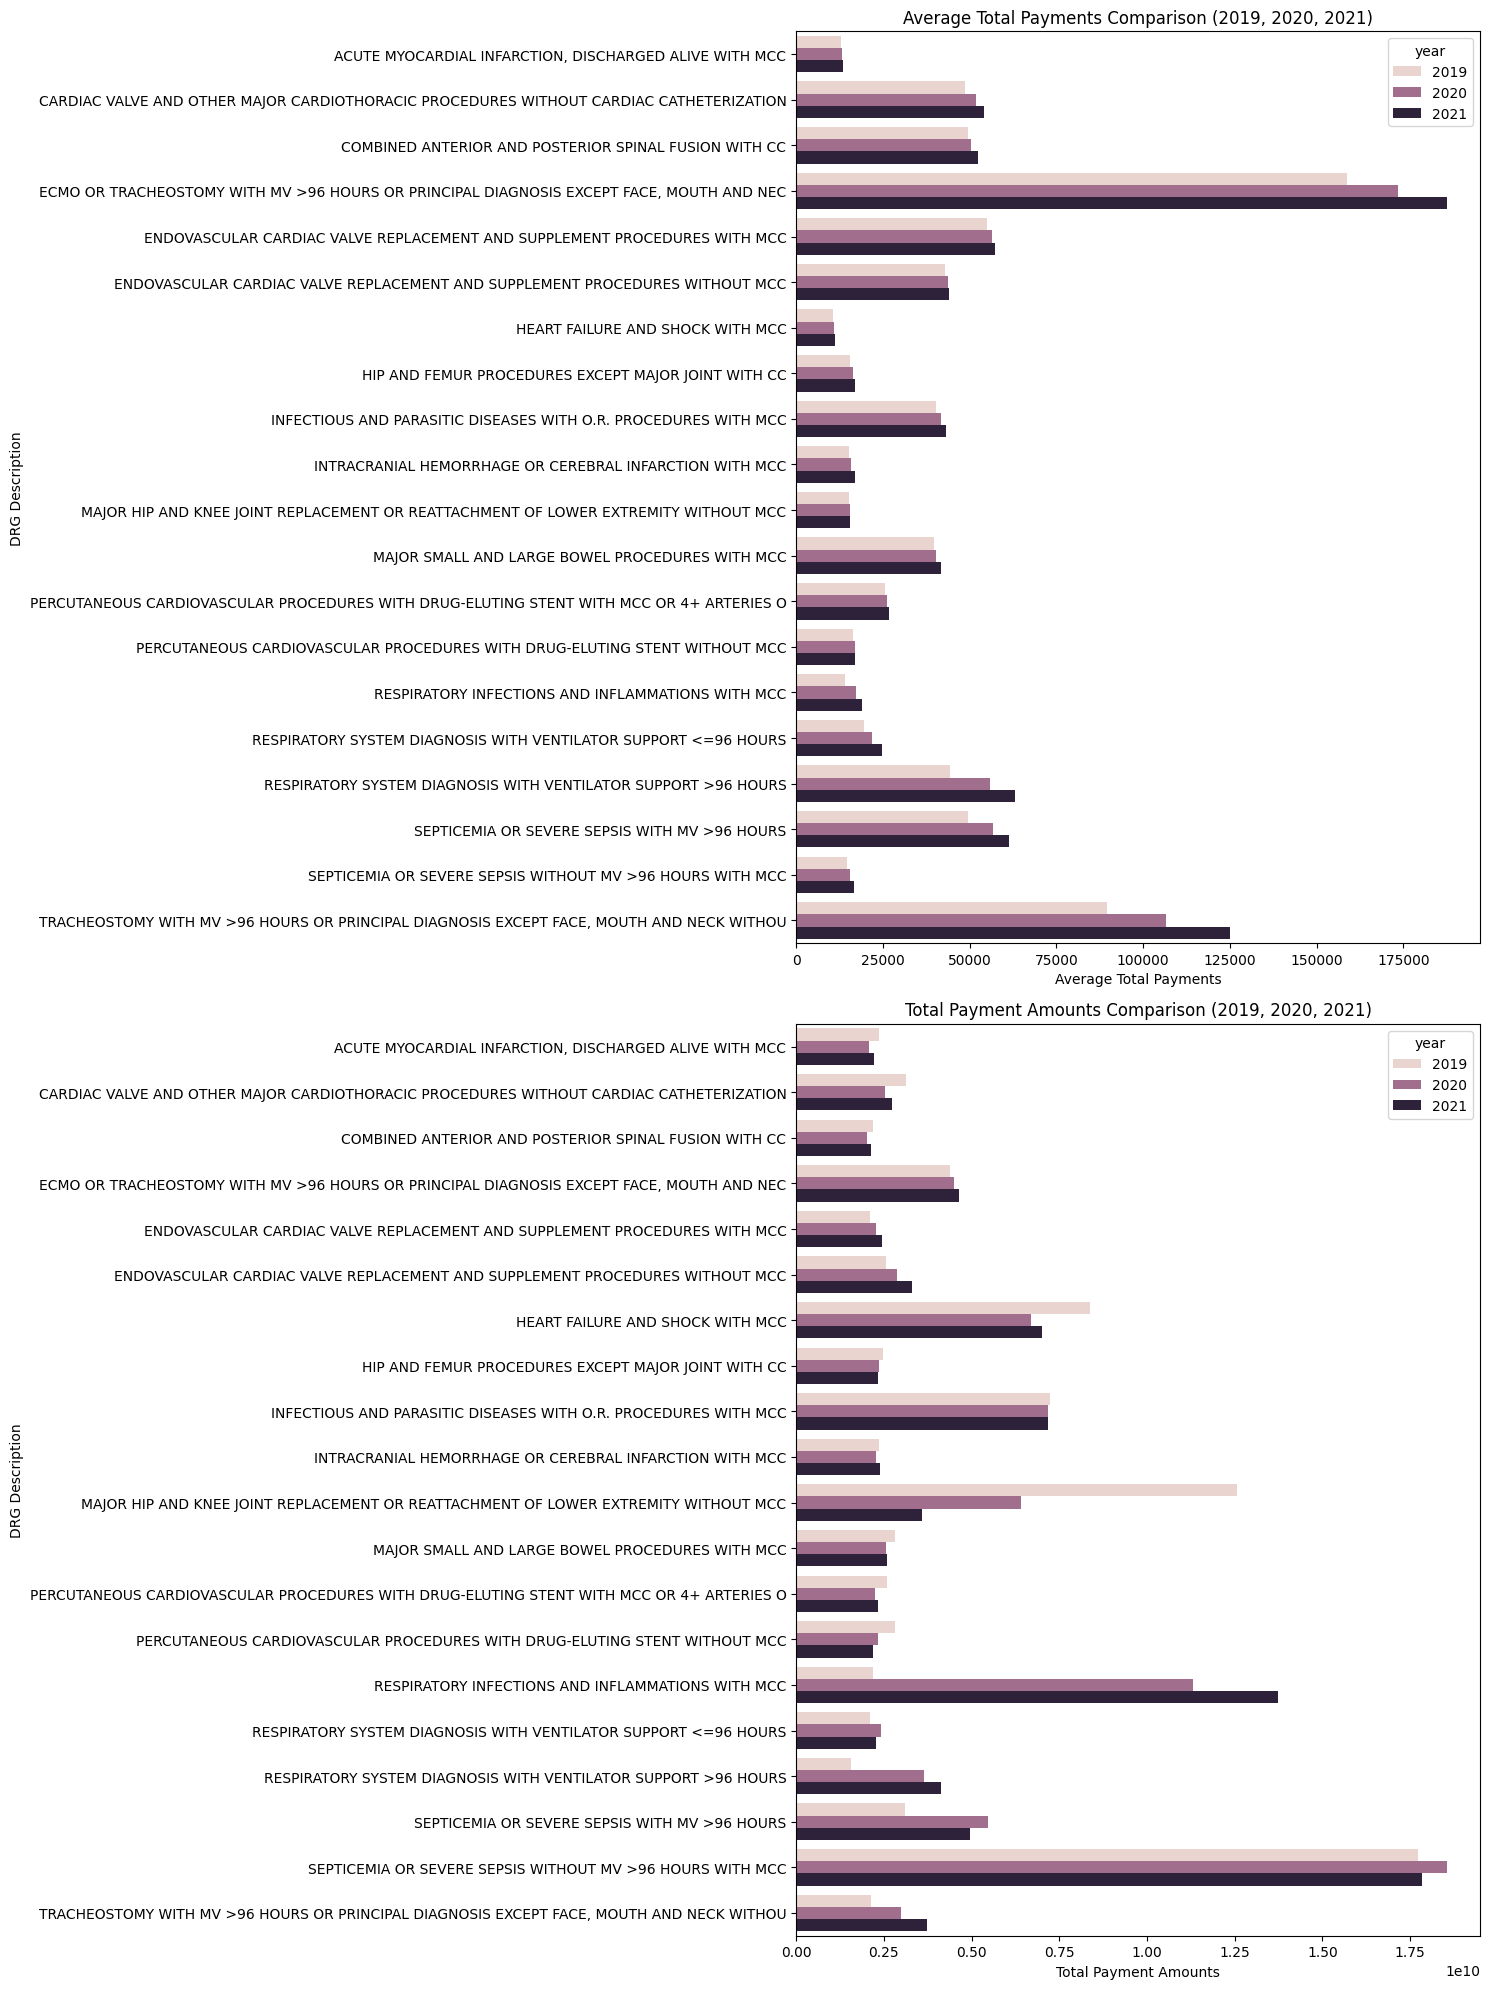

In [25]:
# Function to prepare data for visualization for all three years
def prepare_data_for_visualization(data):
    # Group by DRG and year, then calculate total and average payment amounts
    drg_yearly_costs = data.groupby(['DRG_Desc', 'year']).agg({
        'Avg_Tot_Pymt_Amt': 'mean',
        'Tot_Dschrgs': 'sum'
    }).reset_index()

    # Calculate total payment amounts
    drg_yearly_costs['Total_Tot_Pymt_Amt'] = drg_yearly_costs['Avg_Tot_Pymt_Amt'] * drg_yearly_costs['Tot_Dschrgs']

    return drg_yearly_costs

# Prepare data
drg_yearly_costs = prepare_data_for_visualization(all_geo_data)

# Focus on top 20 DRGs by total payment amounts in 2021
top_20_drgs = drg_yearly_costs[drg_yearly_costs['year'] == 2021].nlargest(20, 'Total_Tot_Pymt_Amt')['DRG_Desc']

# Filter data for only top 20 DRGs
top_20_drg_costs = drg_yearly_costs[drg_yearly_costs['DRG_Desc'].isin(top_20_drgs)]

# Visualize all three years together
def visualize_top_20_drg_comparison_all_years(drg_costs):
    fig, ax = plt.subplots(2, 1, figsize=(15, 20))

    # Plot Average Total Payments
    sns.barplot(x='Avg_Tot_Pymt_Amt', y='DRG_Desc', hue='year', data=drg_costs, ax=ax[0])
    ax[0].set_title('Average Total Payments Comparison (2019, 2020, 2021)')
    ax[0].set_xlabel('Average Total Payments')
    ax[0].set_ylabel('DRG Description')

    # Plot Total Payment Amounts
    sns.barplot(x='Total_Tot_Pymt_Amt', y='DRG_Desc', hue='year', data=drg_costs, ax=ax[1])
    ax[1].set_title('Total Payment Amounts Comparison (2019, 2020, 2021)')
    ax[1].set_xlabel('Total Payment Amounts')
    ax[1].set_ylabel('DRG Description')

    plt.tight_layout()
    plt.show()

# Visualize the data
visualize_top_20_drg_comparison_all_years(top_20_drg_costs)


In [ ]:
# prompt: sort data in charts above from highest to lowest

# Sort the data by the desired metric (e.g., Total_Tot_Pymt_Amt) in descending order
sorted_data = drg_costs.sort_values(by='Total_Tot_Pymt_Amt', ascending=False)

# Visualize the sorted data
visualize_top_20_drg_comparison_all_years(sorted_data)
